In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mpl_toolkits.mplot3d import Axes3D

import os # accessing directory structure
import re
from PIL import Image
from wordcloud import *
from bs4 import BeautifulSoup

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk import pos_tag, RegexpParser

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

import spacy
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix

import spacy
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix

# Load spaCy English NER model
nlp = spacy.load('en_core_web_lg')

import torch
import torch.nn as nn
import torch.optim as optim

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model


from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2024-04-15 10:59:47.448100: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 10:59:47.448194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 10:59:47.547028: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Create a directory if it doesn't exist
directory = '/kaggle/working/images'
if not os.path.exists(directory):
    os.makedirs(directory)

/kaggle/input/generated-data/generated_data.csv
/kaggle/input/recruitment-scam/DataSet.csv


In [3]:
# read the csv into a pandas dataframe
df = pd.read_csv('/kaggle/input/recruitment-scam/DataSet.csv')
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f,f
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [5]:
df.describe()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
count,17880,17534,6333,2868,14572,17880,15191,10684,17880,17880,17880,14409,10830,9775,12977,11425,17880,17880
unique,11231,3105,1337,874,1710,15095,12119,6510,2,2,2,5,7,13,131,37,2,2
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,<p>We help teachers get safe &amp; secure jobs...,"<p>Play with kids, get paid for it </p>\r\n<p>...",<p>University degree required. TEFL / TESOL / ...,<p>See job description</p>,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,f,f
freq,311,718,551,142,726,376,410,726,17113,14220,9088,11620,3809,5145,1734,1749,17014,16980


In [6]:
df = df.drop(['in_balanced_dataset'], axis=1)
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f


# Exploratory Data Analysis

#### Performing EDA on the original Data


Understanding the behaviour of Fraudulent class w.r.t Non Fraudulent class based on following few columns first:
*  telecommuting
*  has_comapany_logo
*  has_questions
*  employment_type
*  required_experience
*  required_education
*  industry
*  function

In [7]:
def addlabels(plot,x,y):
    for i in range(len(x)):
        plot.text(i, y[i], y[i], ha = 'center', style='oblique', weight='bold')

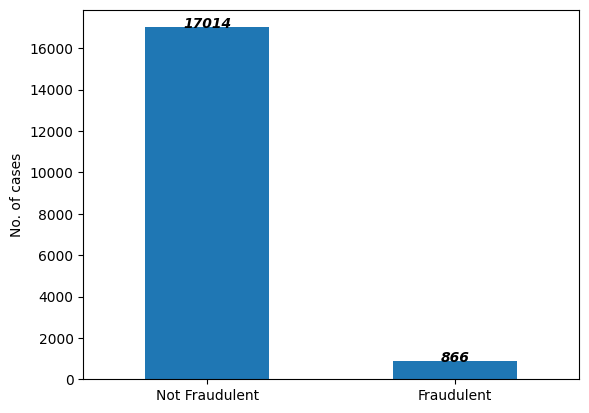

In [8]:
fradulent_samples = df.loc[df['fraudulent'] == 't']
non_fradulent_samples = df.loc[df['fraudulent'] == 'f']
value_counts_fraudulent = df['fraudulent'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_fraudulent.plot(kind='bar')

label_list_fraudulent = list(range(0,len(value_counts_fraudulent)))
addlabels(plt,label_list_fraudulent,value_counts_fraudulent)
plt.xticks([0,1],['Not Fraudulent', 'Fraudulent'], rotation=0)
plt.ylabel('No. of cases')
plt.xlabel('')

# Save the plot to a file
plt.savefig('images/totalCases.png')

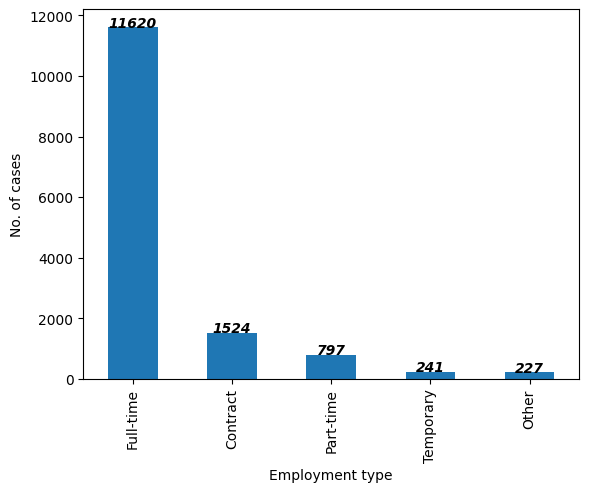

In [9]:
value_counts_employment_type = df['employment_type'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_employment_type.plot(kind='bar')

label_list_employment_type = list(range(0,len(value_counts_employment_type)))
addlabels(plt,label_list_employment_type,value_counts_employment_type)
plt.ylabel('No. of cases')
plt.xlabel('Employment type')

# Save the plot to a file
plt.savefig('images/totalEmploymentCases.png')

In [10]:
def compare_plot_fraudulent_and_nonfraudulent_class(df, feature, tag="original", nrows=1, ncols=2):
    # Filter the DataFrame for fraudulent cases being 'f' and 't'
    filtered_df_f = df.loc[df['fraudulent'] == 'f']
    filtered_df_t = df.loc[df['fraudulent'] == 't']

    # Calculate value counts for employment_type in both filtered DataFrames
    value_counts_f = filtered_df_f[feature].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
    value_counts_t = filtered_df_t[feature].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()

    # Create a figure and axes for subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

    # Plot the bar plots for fraudulent 'f' cases
    value_counts_f.plot(kind='bar', ax=axes[0], color='b', alpha=0.5)
    axes[0].set_title('Non Fraudulent Cases')
    axes[0].set_ylabel('Frequency')
    ax0_list = list(range(0,len(value_counts_f)))
    addlabels(axes[0],ax0_list,value_counts_f)

    # Plot the bar plots for fraudulent 't' cases
    value_counts_t.plot(kind='bar', ax=axes[1], color='r', alpha=0.6)
    axes[1].set_title('Fraudulent Cases')
    axes[1].set_ylabel('Frequency')
    ax1_list = list(range(0,len(value_counts_t)))
    addlabels(axes[1],ax1_list,value_counts_t)

    plt.tight_layout()  # Adjust layout to prevent overlap
    # Save the plot to a file
    if tag is not "fake":
        plt.savefig(f"images/compare_{feature}.png")
    else:
        plt.savefig(f"images/fake_compare_{feature}.png")
    plt.show()

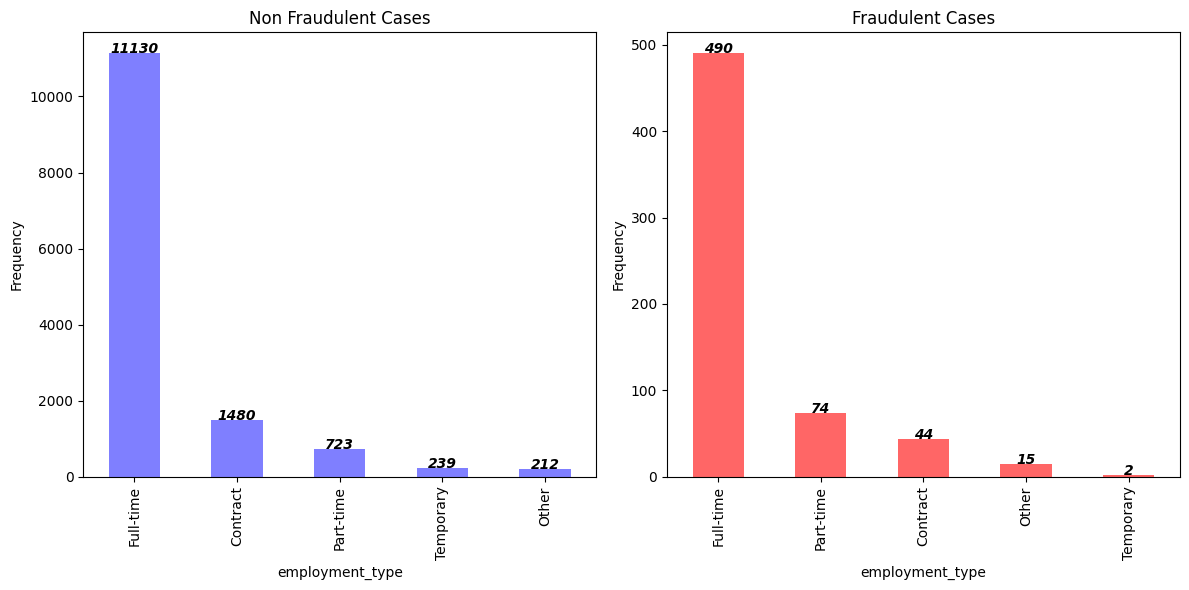

In [11]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'employment_type')

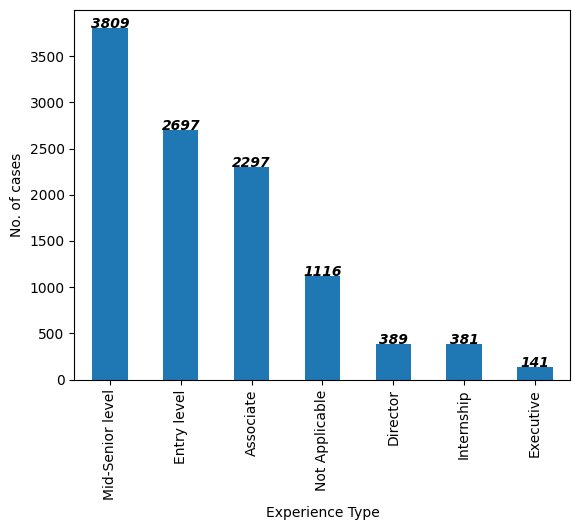

In [12]:
value_counts_required_experience = df['required_experience'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_required_experience.plot(kind='bar')

label_list_required_experience = list(range(0,len(value_counts_required_experience)))
addlabels(plt,label_list_required_experience,value_counts_required_experience)
plt.ylabel('No. of cases')
plt.xlabel('Experience Type')

# Save the plot to a file
plt.savefig('images/totalExperienceType.png')

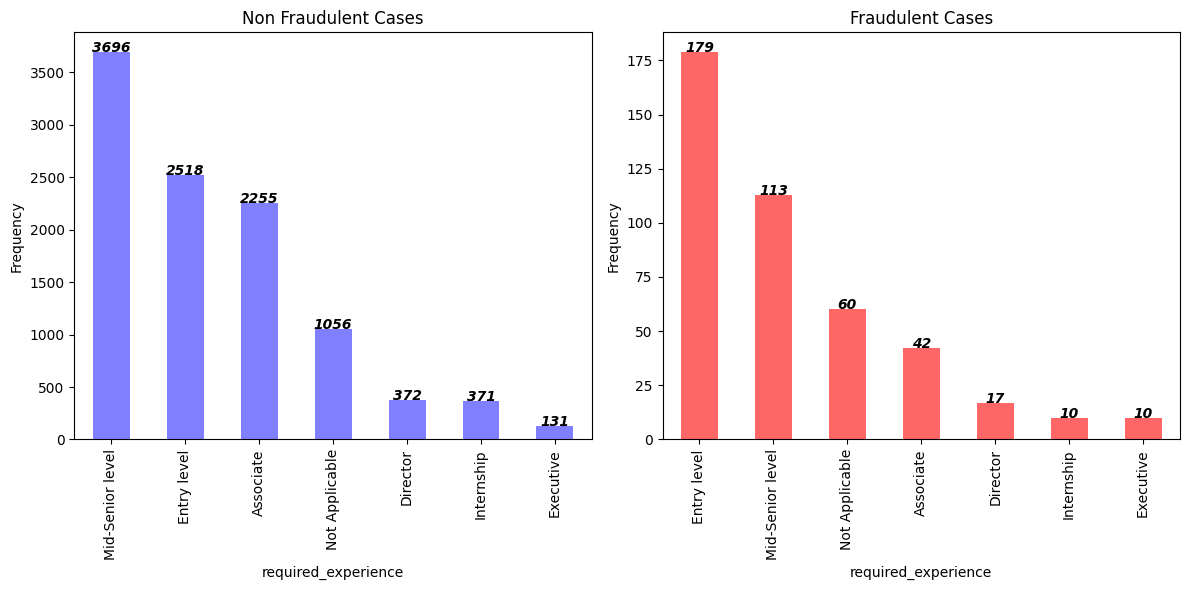

In [13]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'required_experience')

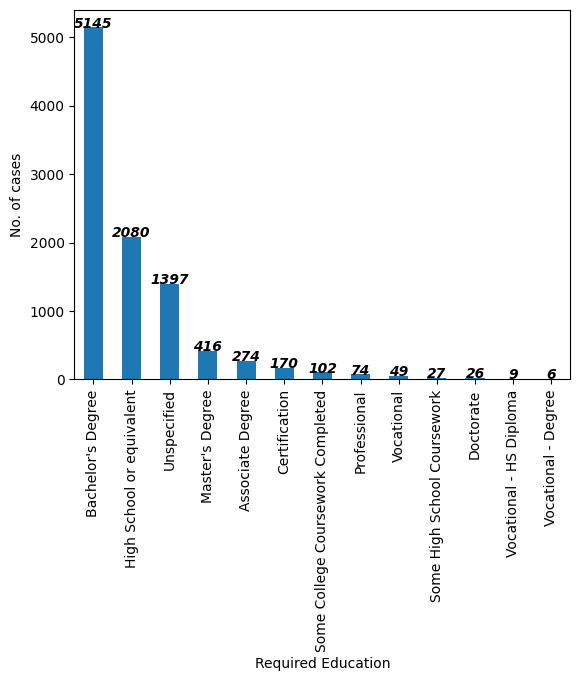

In [14]:
value_counts_required_education = df['required_education'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_required_education.plot(kind='bar')

label_list_required_education = list(range(0,len(value_counts_required_education)))
addlabels(plt,label_list_required_education,value_counts_required_education)
plt.ylabel('No. of cases')
plt.xlabel('Required Education')

# Save the plot to a file
plt.savefig('images/totalRequiredEducationType.png')

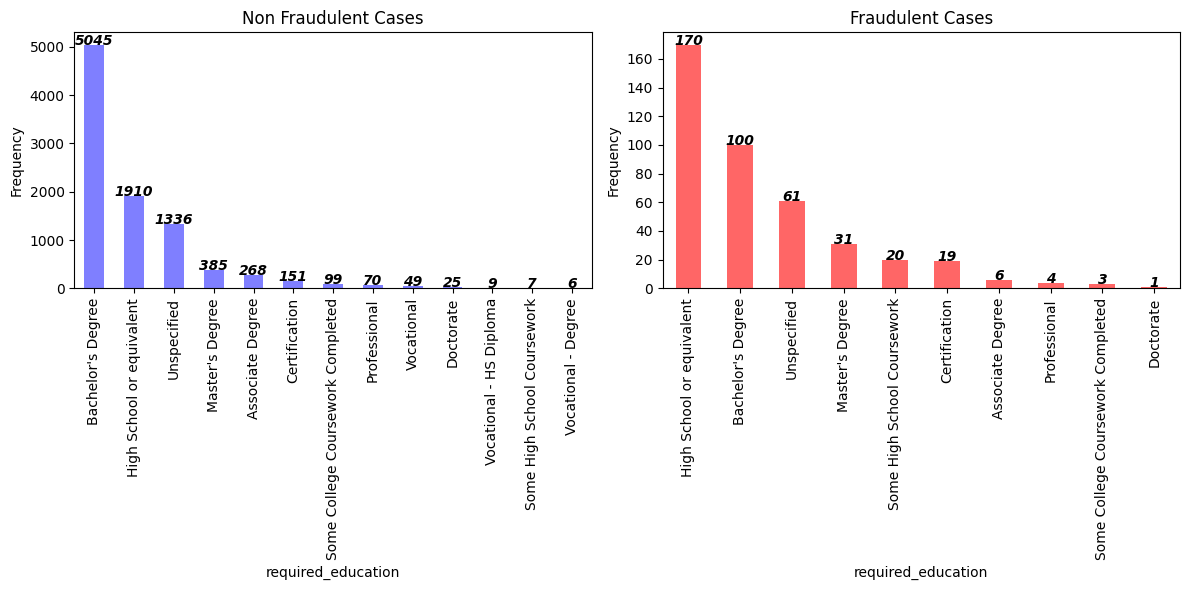

In [15]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'required_education')

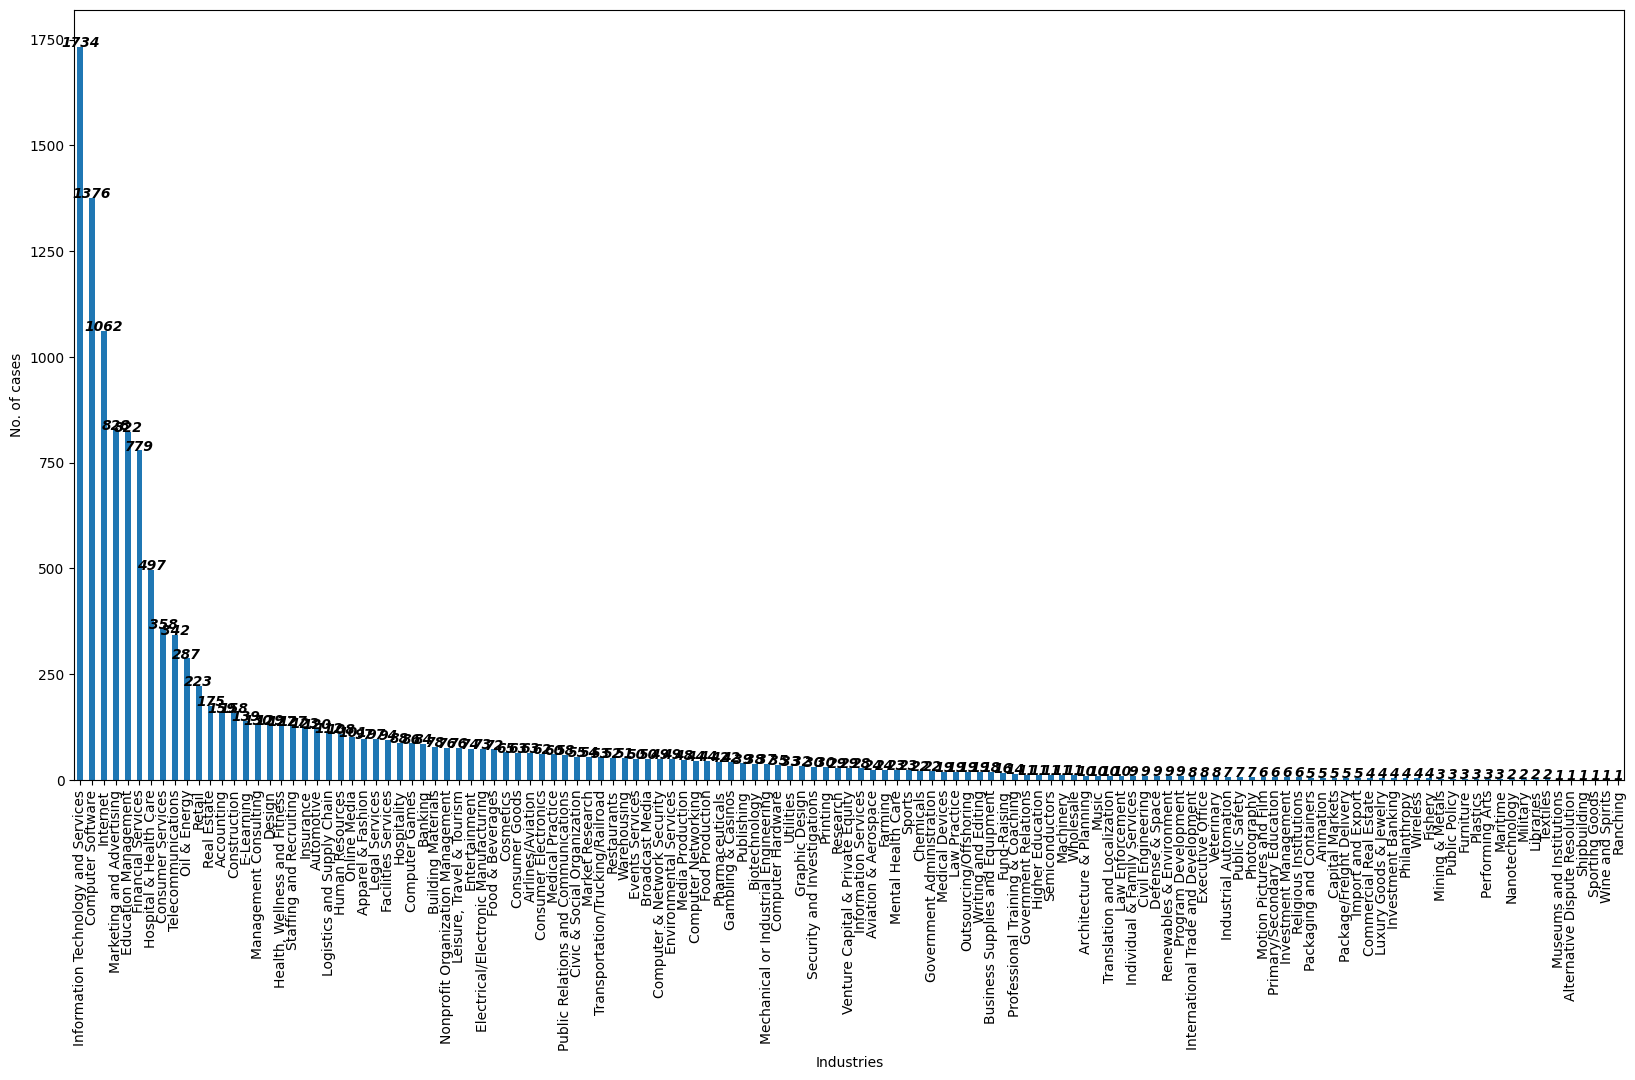

In [16]:
value_counts_industry = df['industry'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_industry.plot(kind='bar',figsize=(20,10))

label_list_industry = list(range(0,len(value_counts_industry)))
addlabels(plt,label_list_industry,value_counts_industry)
plt.ylabel('No. of cases')
plt.xlabel('Industries')

# Save the plot to a file
plt.savefig('images/totalIndustriesType.png')

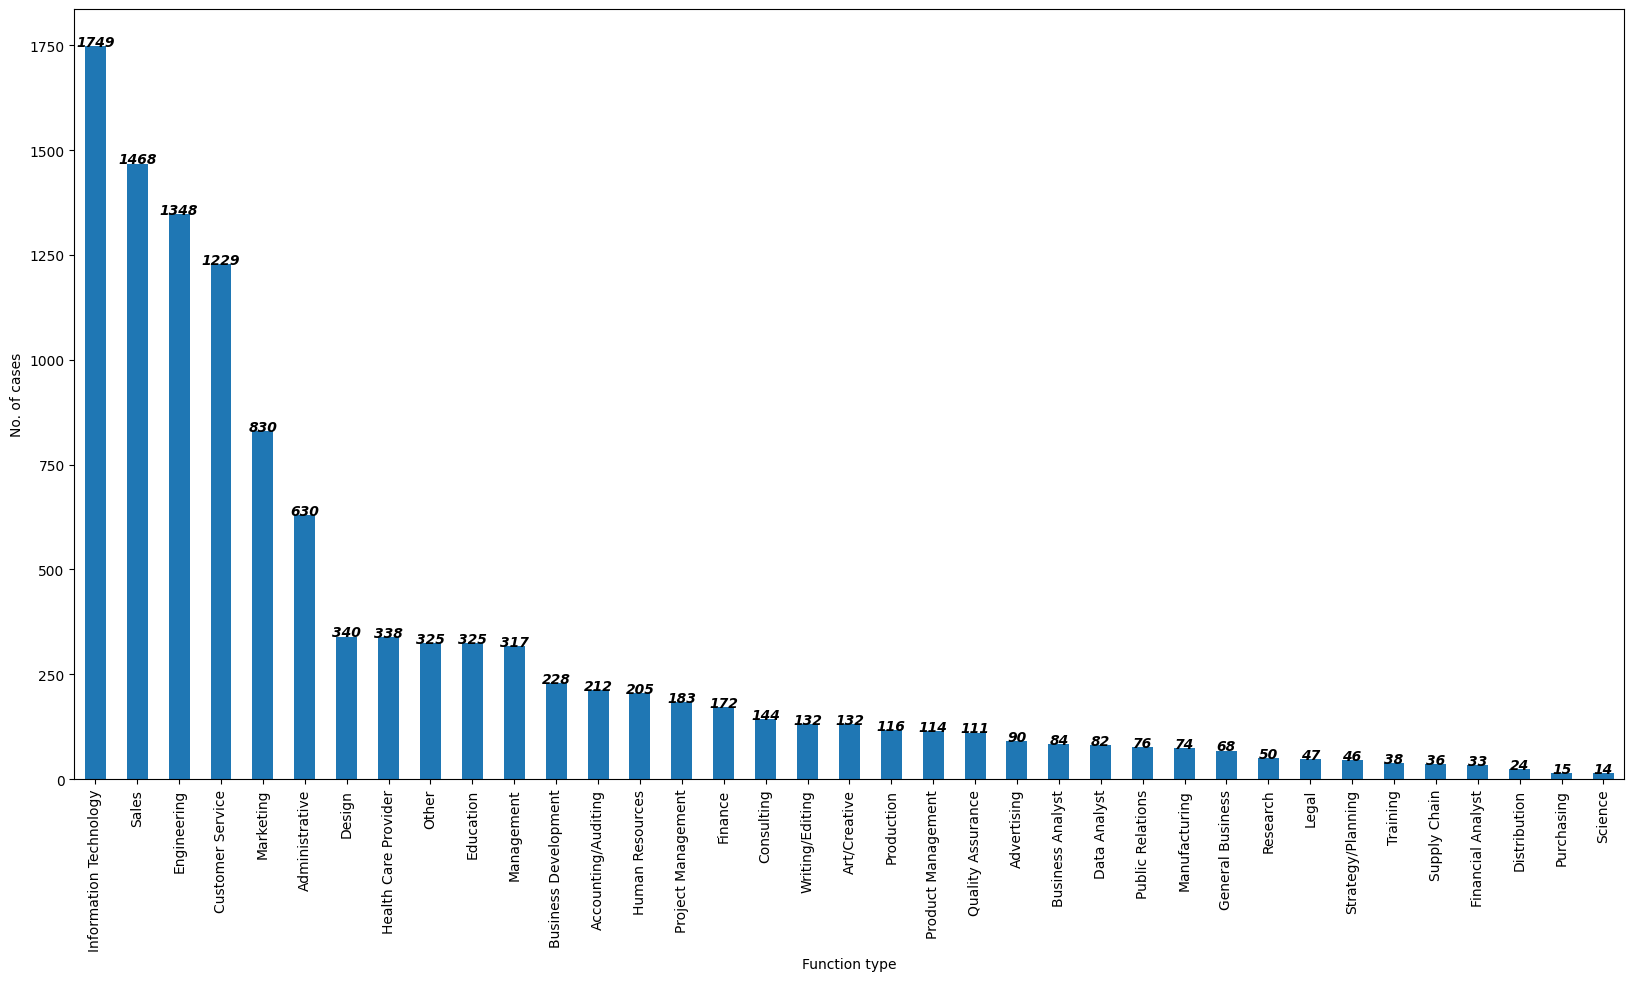

In [17]:
value_counts_function = df['function'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_function.plot(kind='bar',figsize=(20,10))

label_list_function = list(range(0,len(value_counts_function)))
addlabels(plt,label_list_function,value_counts_function)
plt.ylabel('No. of cases')
plt.xlabel('Function type')

# Save the plot to a file
plt.savefig('images/totalFunctionType.png')

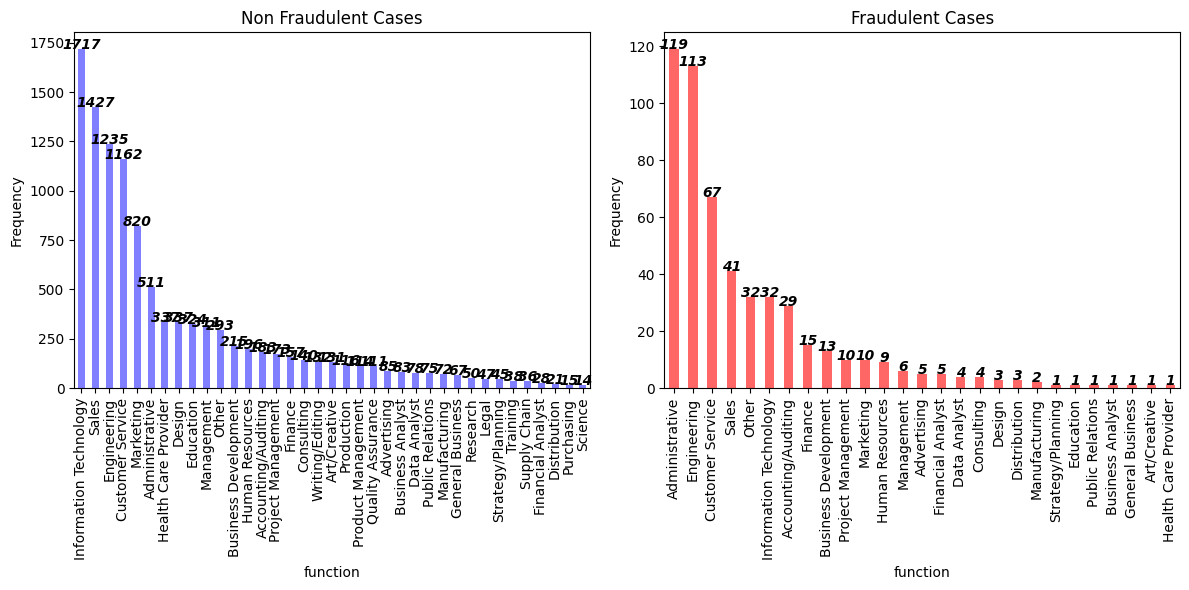

In [18]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'function')

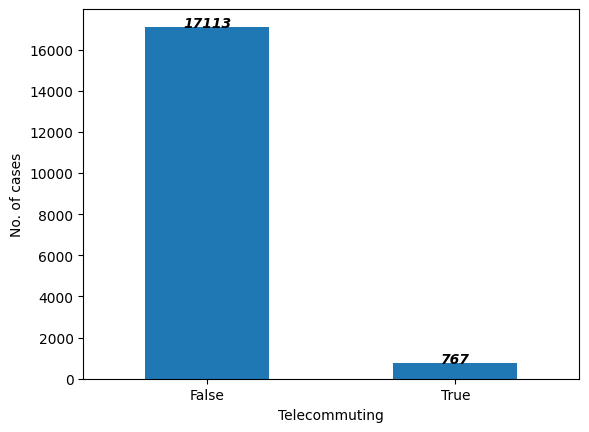

In [19]:
value_counts_telecommuting = df['telecommuting'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_telecommuting.plot(kind='bar')

label_list_telecommuting = list(range(0,len(value_counts_telecommuting)))
addlabels(plt,label_list_telecommuting,value_counts_telecommuting)
plt.xticks([0,1],['False', 'True'], rotation=0)
plt.ylabel('No. of cases')
plt.xlabel('Telecommuting')

# Save the plot to a file
plt.savefig('images/totalTelecommutingCases.png')

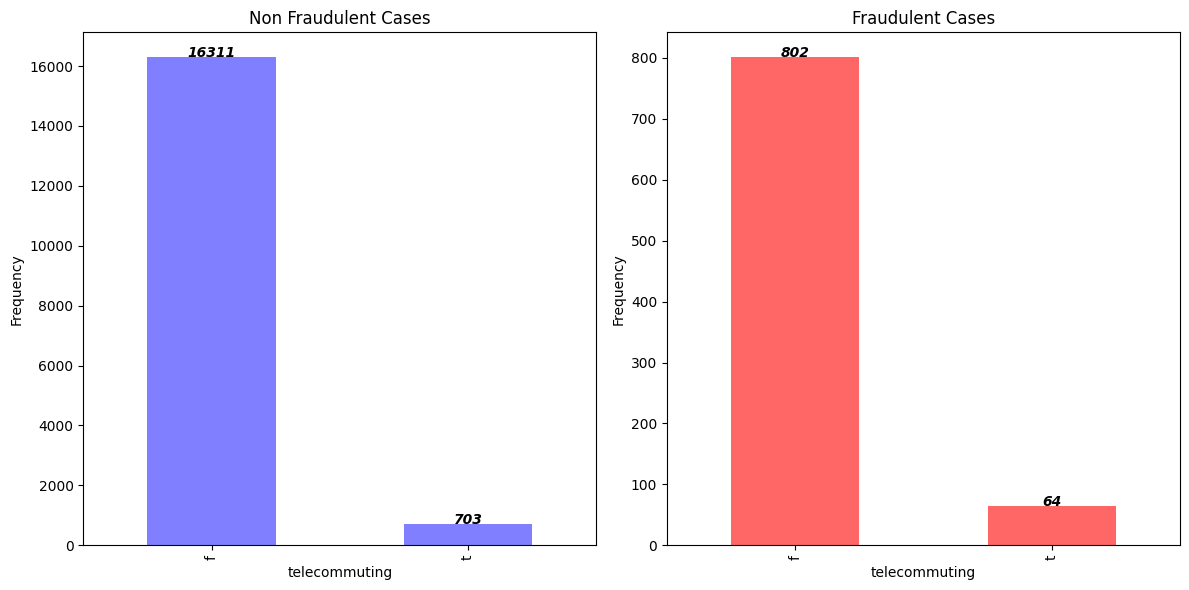

In [20]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'telecommuting')

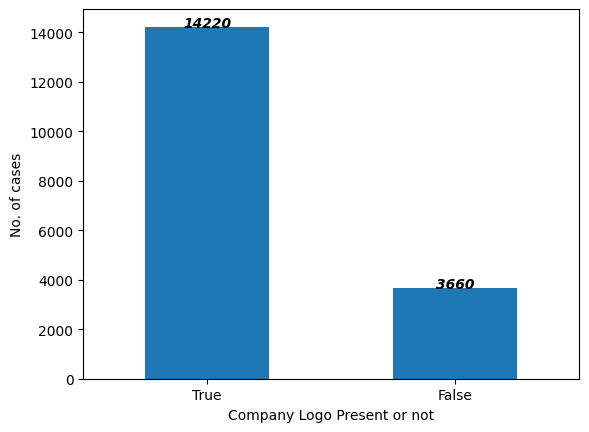

In [21]:
value_counts_has_company_logo = df['has_company_logo'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_has_company_logo.plot(kind='bar')

label_list_has_company_logo = list(range(0,len(value_counts_has_company_logo)))
addlabels(plt,label_list_has_company_logo,value_counts_has_company_logo)
plt.xticks([0,1],['True', 'False'], rotation=0)
plt.ylabel('No. of cases')
plt.xlabel('Company Logo Present or not')

# Save the plot to a file
plt.savefig('images/totalLogoCases.png')

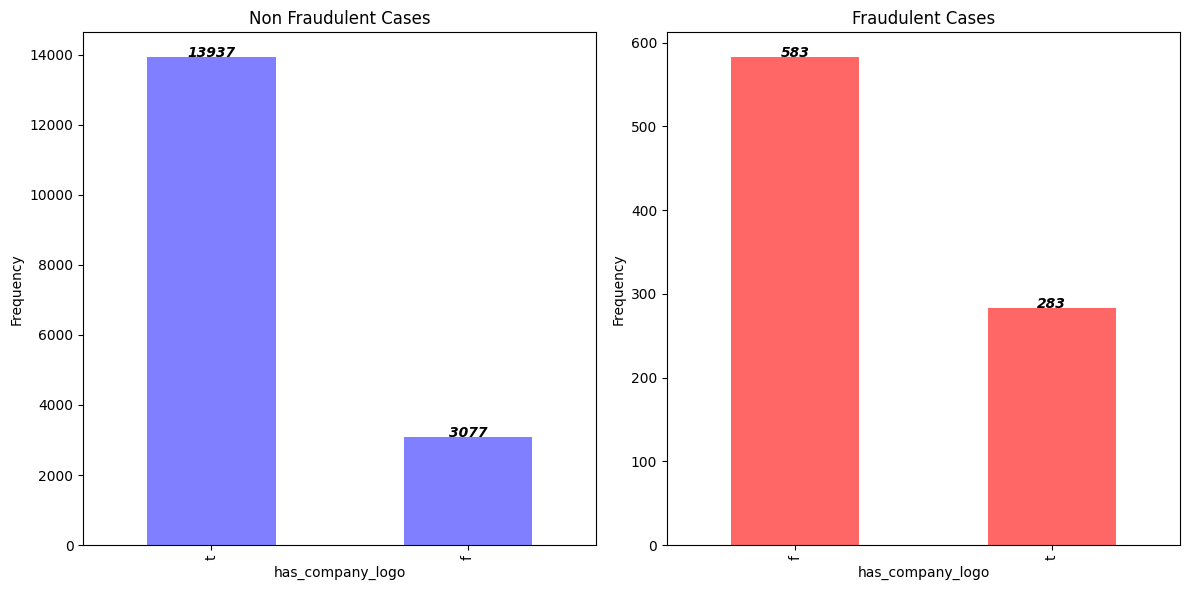

In [22]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'has_company_logo')

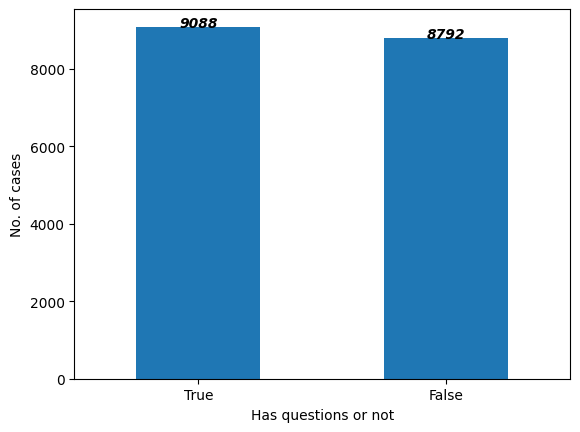

In [23]:
value_counts_has_questions = df['has_questions'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
value_counts_has_questions.plot(kind='bar')

label_list_has_questions = list(range(0,len(value_counts_has_questions)))
addlabels(plt,label_list_has_questions,value_counts_has_questions)
plt.xticks([0,1],['True', 'False'], rotation=0)
plt.ylabel('No. of cases')
plt.xlabel('Has questions or not')

# Save the plot to a file
plt.savefig('images/totalQuestionCases.png')

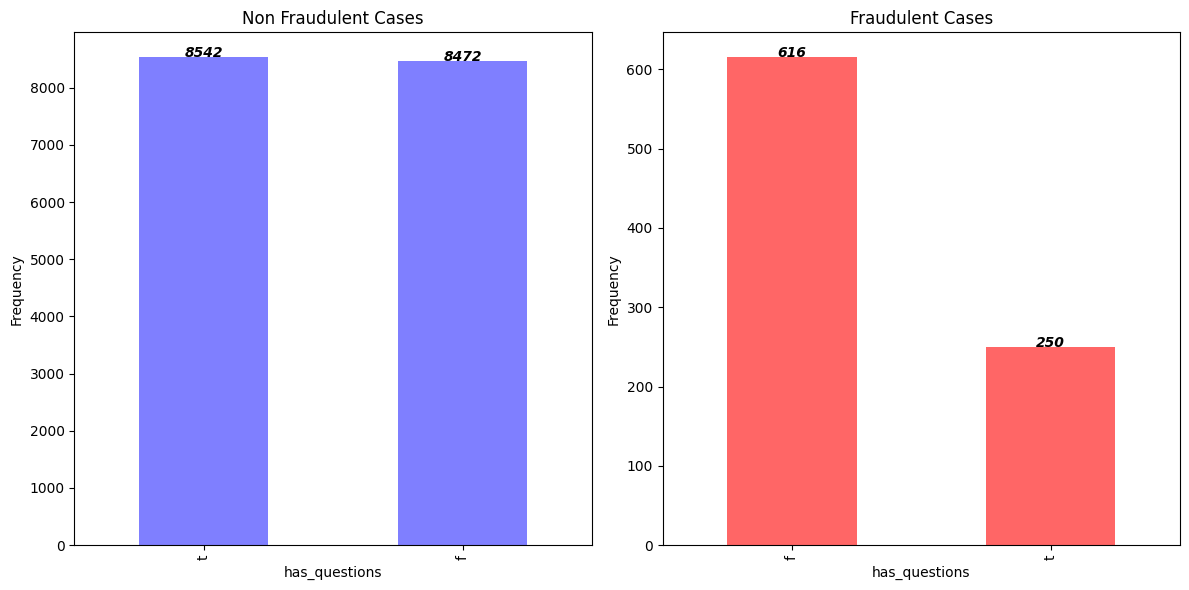

In [24]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'has_questions')

We will extend the analysis of more features(i.e text based features)

In [25]:
# Extracting the country from the location column
def extract_country(value):
    if isinstance(value, str):
        items = [item.strip() for item in value.split(',')]
        if len(items) > 0 and len(items[0]) > 0:
            return items[0]
    return np.nan

# extract the country from the location
df['country'] = df['location'].apply(lambda x: extract_country(x))

df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,US
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f,CA
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,US
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f,US
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,NG


In [26]:
# We will drop all categorical values that have too many options (above one percent of dataset)
df = df.drop(['location', 'department'], axis=1)

In [27]:
# print all chars used in title
chars = set()
for idx, value in non_fradulent_samples.title.items():
    if isinstance(value, str):
        chars.update(set(value))
print(chars)

{'u', '*', 'x', 'D', '-', ',', 'O', '7', '1', 'B', '4', ':', '|', 'C', 'r', 'd', 'o', 'z', 'a', 'G', '2', ')', '%', '!', 'Z', 'i', 'Y', '#', 'F', '\\', 'b', 'J', 'n', 'V', 'K', '9', 'p', 'l', 's', '"', '~', 'T', 'c', 'v', "'", '0', 'q', 'h', '$', 'e', 'k', 'm', 'y', 'U', '(', '[', 't', 'g', 'L', 'E', '&', 'S', 'H', 'R', '?', '+', ']', '\t', 'w', ' ', 'P', 'M', 'N', '@', '_', '6', 'I', 'W', 'X', '/', '8', '.', 'Q', 'A', '3', 'f', 'j', '5'}


In [28]:
# print all chars used in title
chars_fradulent = set()
for idx, value in fradulent_samples.title.items():
    if isinstance(value, str):
        chars_fradulent.update(set(value))
print(chars)

{'u', '*', 'x', 'D', '-', ',', 'O', '7', '1', 'B', '4', ':', '|', 'C', 'r', 'd', 'o', 'z', 'a', 'G', '2', ')', '%', '!', 'Z', 'i', 'Y', '#', 'F', '\\', 'b', 'J', 'n', 'V', 'K', '9', 'p', 'l', 's', '"', '~', 'T', 'c', 'v', "'", '0', 'q', 'h', '$', 'e', 'k', 'm', 'y', 'U', '(', '[', 't', 'g', 'L', 'E', '&', 'S', 'H', 'R', '?', '+', ']', '\t', 'w', ' ', 'P', 'M', 'N', '@', '_', '6', 'I', 'W', 'X', '/', '8', '.', 'Q', 'A', '3', 'f', 'j', '5'}


Its is seen that there is not difference between characters used in the Title of Fradulent Job advertisement and Non Fradulent Job advertisement

#### As we are able to see that the dataset is heavily skewed. 
#### So we generated dataset for fake job cases and merged that data with the original data

In [29]:
# read the csv into a pandas dataframe
df_fake = pd.read_csv('/kaggle/input/generated-data/generated_data.csv')

df_fake

,Unnamed: 0,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,17221,Health + Safety Professional,"US, OK, Oklahoma City",Clerical,2000-2000,<p>We have aggressive growth plans in place fo...,<p><b>Apply using below link </b></p>\r\n<p><b...,<ul>\r\n<li>Maintain attention and concentrati...,<p>Sales Executive</p>,f,f,f,Full-time,NaN,NaN,Banking,Administrative,t,t
1,15644,Health + Safety Professional,"US, CA,",Engineering,NaN,NaN,<p>We are currently looking for a client-focus...,<p>Offshore or onsite is ok.</p>\r\n<p> Durati...,<p>We offer</p>\r\n<p>• Friendly colleagues in...,f,f,t,Full-time,NaN,NaN,NaN,NaN,t,f
2,16326,Facilities Development Engineer,"US, CA,",Engineering,NaN,"<p><img src=""#URL_a31880b95ada3459e9067539bf1b...","<h3><img src=""file:#EMAIL_57a097453f1e8230376d...",<p>Key Qualifications:</p>\r\n<ul>\r\n<li>Mini...,<p>All you need is access to the Internet and ...,f,t,f,Full-time,NaN,High School or equivalent,NaN,Administrative,t,t
3,15519,SAP Support Advisor,"US, IL, hazelcrest",NaN,30000-40000,NaN,<p>As an Administrative Assistant you will be...,<p>Must have at least 3 years experience in a ...,<p>Salary:119k CAD</p>\r\n<p>skype: #URL_d55e4...,f,f,t,Full-time,Entry level,NaN,Banking,NaN,t,t
4,98,SAP Support Advisor,"US, AL, ALEXANDER CITY",Engineering,NaN,<p><b>The Accion story began more than 100 ye...,<p>Colonial is looking for 5 sharp people to i...,<p>Skills and Specifications:</p>\r\n<p>* Must...,<p>Sales Executive</p>,f,f,t,Full-time,Entry level,NaN,NaN,NaN,t,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,16203,HSE Manager,"US, FL,",MAIL UNIT 65036,NaN,NaN,<p>The maintenance supervisor is responsible f...,<p>Qualifications &amp; personal attributes <b...,<p>All you need is access to the Internet and ...,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,f
4996,15977,SAP Support Advisor,"US, CA,",biotech,2000-3000,NaN,<p>Colonial is looking for 5 sharp people to i...,"<p>Positive attitude, high integrity,<br>Basic...",<p>Sales Executive</p>,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,f
4997,98,Informatica/ Etl Tester,"US, IL, hazelcrest",NaN,45000-70000,NaN,"<p><img src=""#URL_8c6c20a628a1b59ab4cd0e264525...",<p>Qualifications &amp; personal attributes</p...,<p>Sales Executive</p>,f,f,t,Contract,Mid-Senior level,NaN,Computer Software,Information Technology,t,f
4998,15703,SAP Support Advisor,"US, PA, Philadelphia",Oil & Energy,65000-85000,<p><i><b>With decades of experience and more t...,<p>At Puget Sound<br>Energy (PSE) we have a lo...,<p>Skills/Qualifications:<br>- Post-secondary ...,<h3>What Is Offered</h3>\r\n<p>Our client's co...,f,t,f,NaN,Entry level,Master's Degree,NaN,NaN,t,f


In [30]:
# extract the country from the location
df_fake['country'] = df_fake['location'].apply(lambda x: extract_country(x))

# We will drop all categorical values that have too many options (above one percent of dataset)
df_fake = df_fake.drop(['Unnamed: 0', 'location', 'department', 'in_balanced_dataset'], axis=1)
df_fake

,title,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Health + Safety Professional,2000-2000,<p>We have aggressive growth plans in place fo...,<p><b>Apply using below link </b></p>\r\n<p><b...,<ul>\r\n<li>Maintain attention and concentrati...,<p>Sales Executive</p>,f,f,f,Full-time,NaN,NaN,Banking,Administrative,t,US
1,Health + Safety Professional,NaN,NaN,<p>We are currently looking for a client-focus...,<p>Offshore or onsite is ok.</p>\r\n<p> Durati...,<p>We offer</p>\r\n<p>• Friendly colleagues in...,f,f,t,Full-time,NaN,NaN,NaN,NaN,t,US
2,Facilities Development Engineer,NaN,"<p><img src=""#URL_a31880b95ada3459e9067539bf1b...","<h3><img src=""file:#EMAIL_57a097453f1e8230376d...",<p>Key Qualifications:</p>\r\n<ul>\r\n<li>Mini...,<p>All you need is access to the Internet and ...,f,t,f,Full-time,NaN,High School or equivalent,NaN,Administrative,t,US
3,SAP Support Advisor,30000-40000,NaN,<p>As an Administrative Assistant you will be...,<p>Must have at least 3 years experience in a ...,<p>Salary:119k CAD</p>\r\n<p>skype: #URL_d55e4...,f,f,t,Full-time,Entry level,NaN,Banking,NaN,t,US
4,SAP Support Advisor,NaN,<p><b>The Accion story began more than 100 ye...,<p>Colonial is looking for 5 sharp people to i...,<p>Skills and Specifications:</p>\r\n<p>* Must...,<p>Sales Executive</p>,f,f,t,Full-time,Entry level,NaN,NaN,NaN,t,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HSE Manager,NaN,NaN,<p>The maintenance supervisor is responsible f...,<p>Qualifications &amp; personal attributes <b...,<p>All you need is access to the Internet and ...,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,US
4996,SAP Support Advisor,2000-3000,NaN,<p>Colonial is looking for 5 sharp people to i...,"<p>Positive attitude, high integrity,<br>Basic...",<p>Sales Executive</p>,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,US
4997,Informatica/ Etl Tester,45000-70000,NaN,"<p><img src=""#URL_8c6c20a628a1b59ab4cd0e264525...",<p>Qualifications &amp; personal attributes</p...,<p>Sales Executive</p>,f,f,t,Contract,Mid-Senior level,NaN,Computer Software,Information Technology,t,US
4998,SAP Support Advisor,65000-85000,<p><i><b>With decades of experience and more t...,<p>At Puget Sound<br>Energy (PSE) we have a lo...,<p>Skills/Qualifications:<br>- Post-secondary ...,<h3>What Is Offered</h3>\r\n<p>Our client's co...,f,t,f,NaN,Entry level,Master's Degree,NaN,NaN,t,US


In [31]:
df = pd.concat([df, df_fake], axis=0)
df

,title,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,US
1,Customer Service - Cloud Video Production,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,NZ
2,Commissioning Machinery Assistant (CMA),NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,US
3,Account Executive - Washington DC,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,US
4,Bill Review Manager,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HSE Manager,NaN,NaN,<p>The maintenance supervisor is responsible f...,<p>Qualifications &amp; personal attributes <b...,<p>All you need is access to the Internet and ...,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,US
4996,SAP Support Advisor,2000-3000,NaN,<p>Colonial is looking for 5 sharp people to i...,"<p>Positive attitude, high integrity,<br>Basic...",<p>Sales Executive</p>,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,US
4997,Informatica/ Etl Tester,45000-70000,NaN,"<p><img src=""#URL_8c6c20a628a1b59ab4cd0e264525...",<p>Qualifications &amp; personal attributes</p...,<p>Sales Executive</p>,f,f,t,Contract,Mid-Senior level,NaN,Computer Software,Information Technology,t,US
4998,SAP Support Advisor,65000-85000,<p><i><b>With decades of experience and more t...,<p>At Puget Sound<br>Energy (PSE) we have a lo...,<p>Skills/Qualifications:<br>- Post-secondary ...,<h3>What Is Offered</h3>\r\n<p>Our client's co...,f,t,f,NaN,Entry level,Master's Degree,NaN,NaN,t,US


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22880 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                22880 non-null  object
 1   salary_range         4716 non-null   object
 2   company_profile      15764 non-null  object
 3   description          22880 non-null  object
 4   requirements         20188 non-null  object
 5   benefits             15684 non-null  object
 6   telecommuting        22880 non-null  object
 7   has_company_logo     22880 non-null  object
 8   has_questions        22880 non-null  object
 9   employment_type      18829 non-null  object
 10  required_experience  13572 non-null  object
 11  required_education   11453 non-null  object
 12  industry             16807 non-null  object
 13  function             13844 non-null  object
 14  fraudulent           22880 non-null  object
 15  country              22480 non-null  object
dtypes: object(

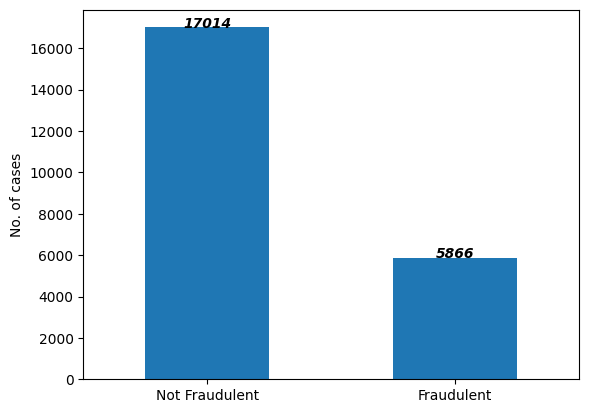

In [33]:
fake_fradulent_samples = df.loc[df['fraudulent'] == 't']
fake_non_fradulent_samples = df.loc[df['fraudulent'] == 'f']
fake_value_counts_fraudulent = df['fraudulent'].apply(lambda x: str(x) if not pd.isna(x) else np.nan).value_counts()
fake_value_counts_fraudulent.plot(kind='bar')

fake_label_list_fraudulent = list(range(0,len(value_counts_fraudulent)))
addlabels(plt,fake_label_list_fraudulent,fake_value_counts_fraudulent)
plt.xticks([0,1],['Not Fraudulent', 'Fraudulent'], rotation=0)
plt.ylabel('No. of cases')
plt.xlabel('')

# Save the plot to a file
plt.savefig('images/fake_totalCases.png')

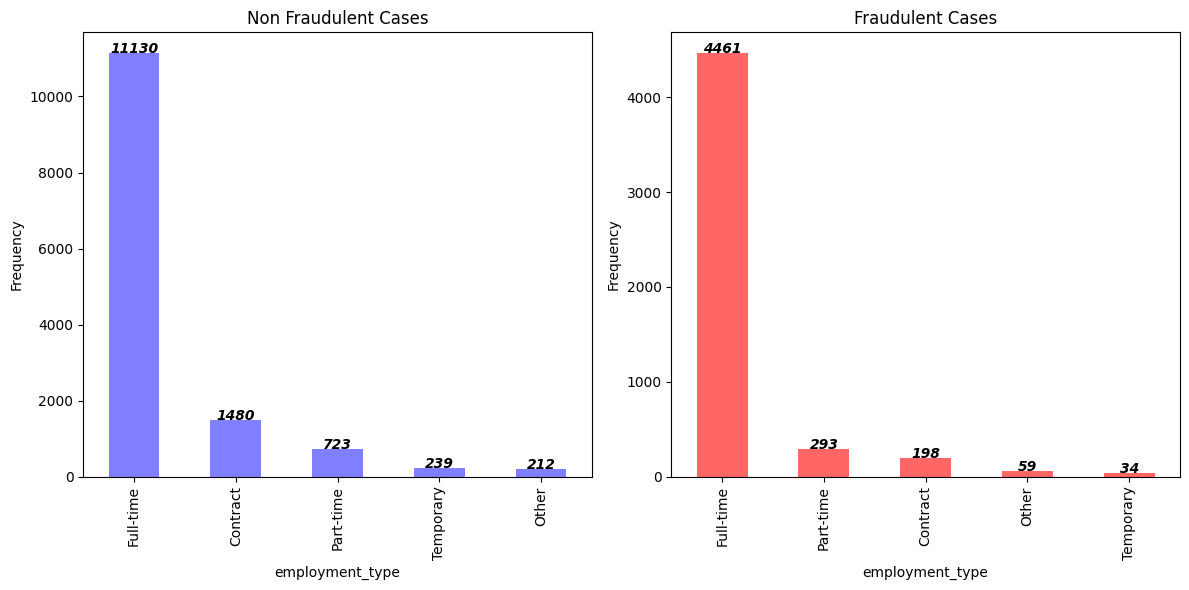

In [34]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'employment_type','fake')

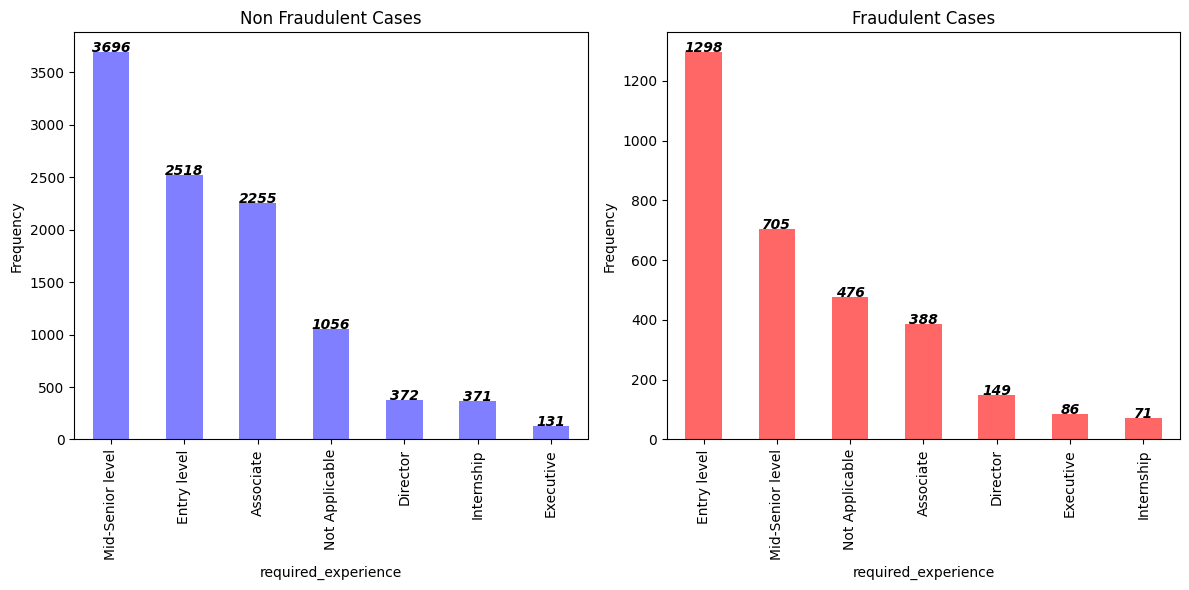

In [35]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'required_experience','fake')

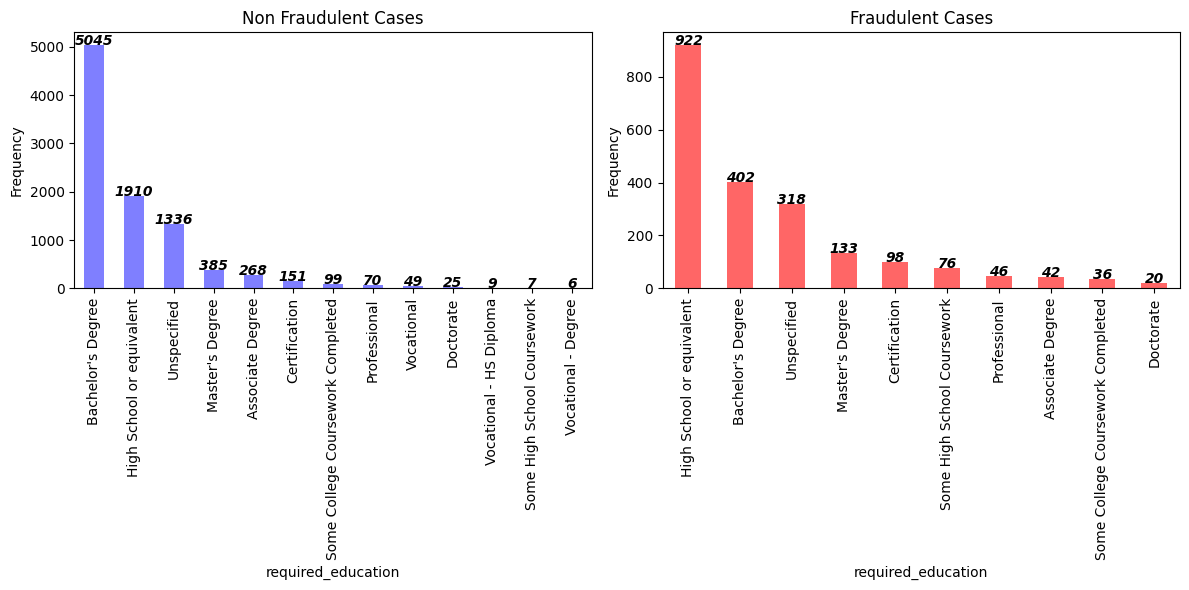

In [36]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'required_education','fake')

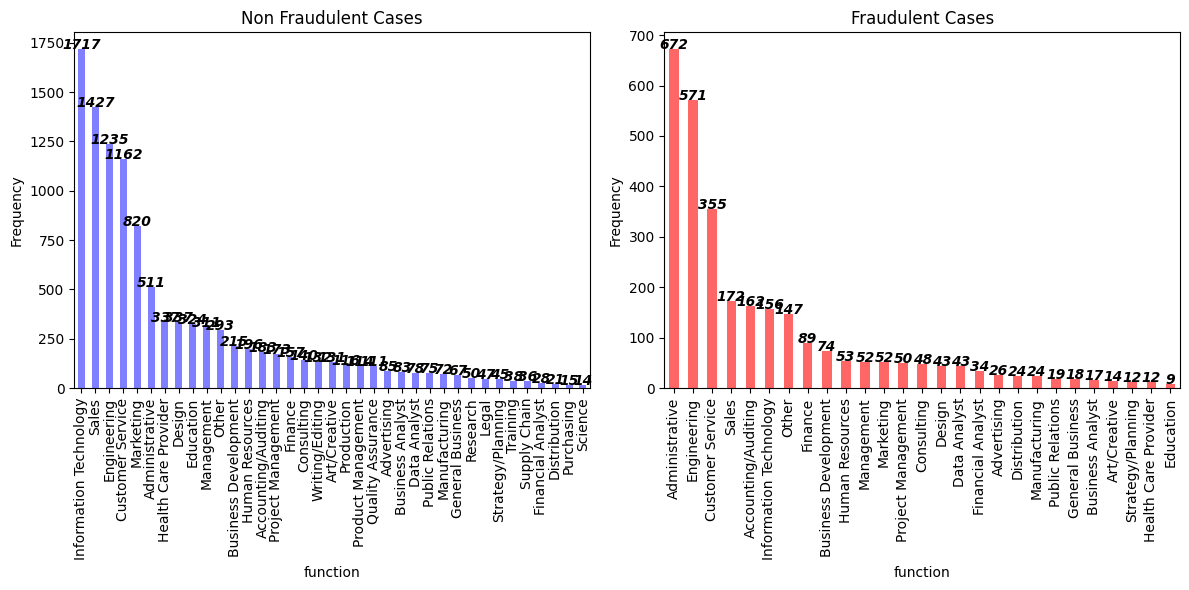

In [37]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'function','fake')

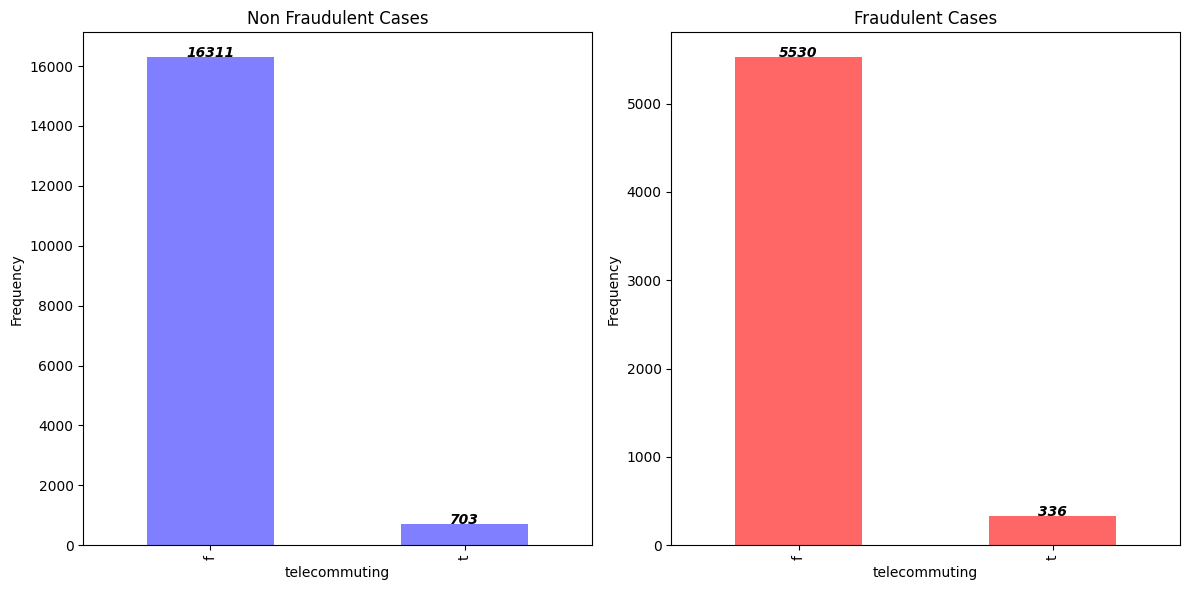

In [38]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'telecommuting','fake')

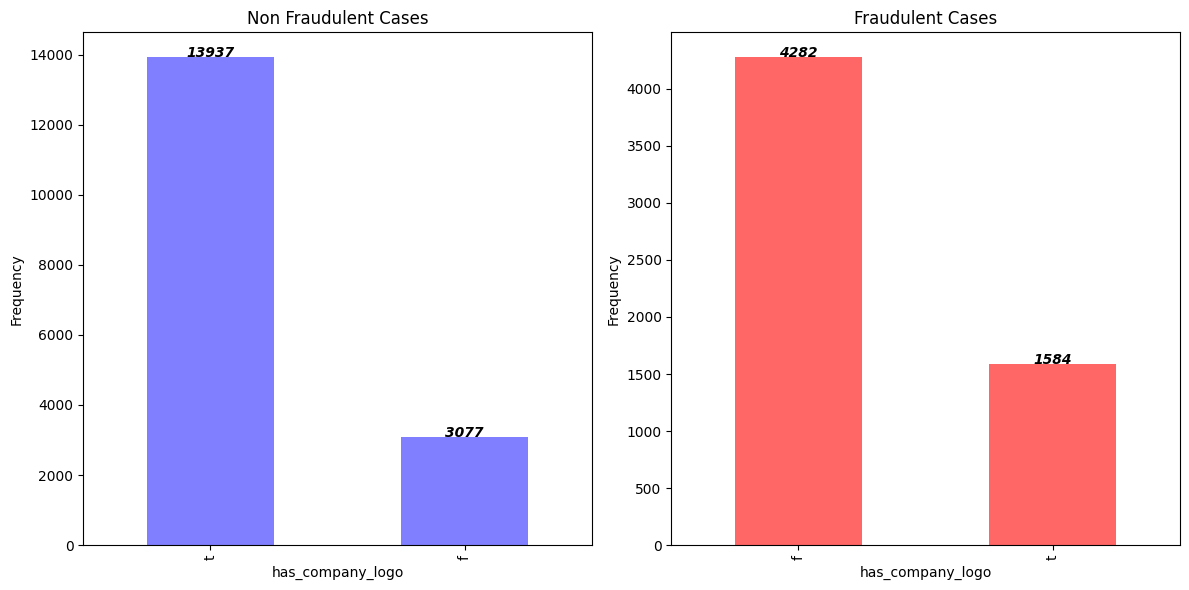

In [39]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'has_company_logo','fake')

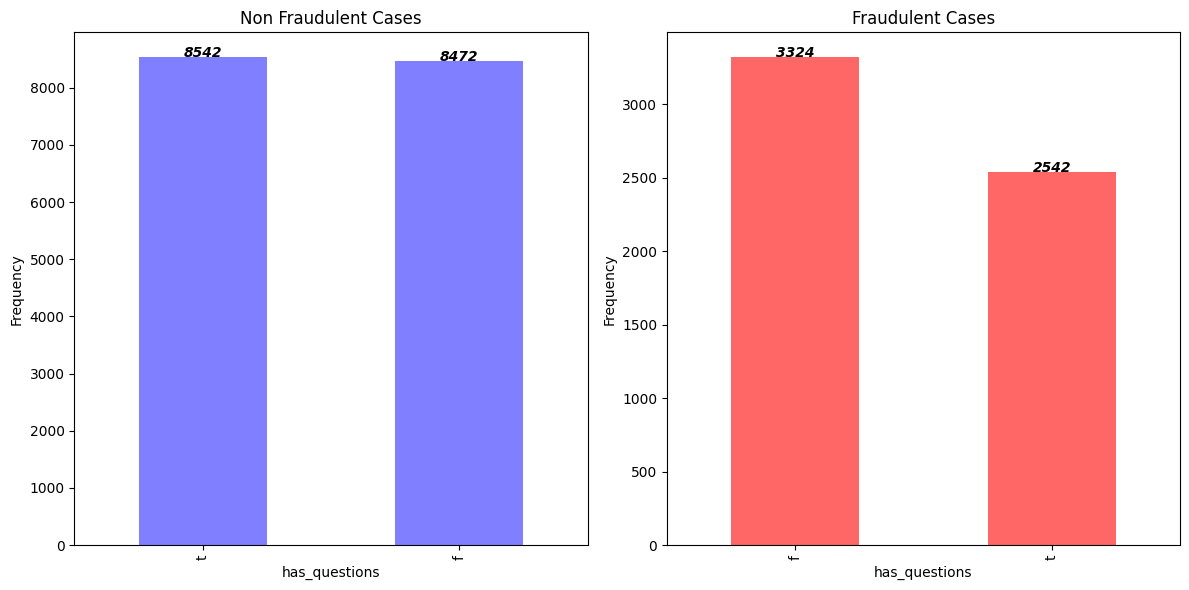

In [40]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'has_questions','fake')

## Text Processing
#### After performing good amount of EDA on the dataset. Now performing Text preprocessing in it to clean the dataset from unwanted characters and focus on important words only

In [41]:
df['title_company_profile_description_requirements_benefits'] = df['title'] + ' ' + df ['company_profile'].fillna('').map(str) + ' ' + df ['description'].fillna('').map(str) + ' ' + df ['requirements'].fillna('').map(str) + ' ' + df ['benefits'].fillna('').map(str)
df = df.drop(['title', 'company_profile','description', 'requirements', 'benefits'], axis=1)
df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,title_company_profile_description_requirements_benefits
0,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,US,"Marketing Intern <h3>We're Food52, and we've c..."
1,NaN,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,NZ,Customer Service - Cloud Video Production <h3>...
2,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,US,Commissioning Machinery Assistant (CMA) <h3></...
3,NaN,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,US,Account Executive - Washington DC <p>Our passi...
4,NaN,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,US,Bill Review Manager <p>SpotSource Solutions LL...
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,US,HSE Manager <p>The maintenance supervisor is ...
4996,2000-3000,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,US,SAP Support Advisor <p>Colonial is looking fo...
4997,45000-70000,f,f,t,Contract,Mid-Senior level,NaN,Computer Software,Information Technology,t,US,"Informatica/ Etl Tester <p><img src=""#URL_8c6..."
4998,65000-85000,f,t,f,NaN,Entry level,Master's Degree,NaN,NaN,t,US,SAP Support Advisor <p><i><b>With decades of e...


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22880 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   salary_range                                             4716 non-null   object
 1   telecommuting                                            22880 non-null  object
 2   has_company_logo                                         22880 non-null  object
 3   has_questions                                            22880 non-null  object
 4   employment_type                                          18829 non-null  object
 5   required_experience                                      13572 non-null  object
 6   required_education                                       11453 non-null  object
 7   industry                                                 16807 non-null  object
 8   function                                  

In [43]:
# droping the rows where 'title_company_profile_description_requirements_benefits' column contains NULL
df.dropna(subset=['title_company_profile_description_requirements_benefits','fraudulent'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22880 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   salary_range                                             4716 non-null   object
 1   telecommuting                                            22880 non-null  object
 2   has_company_logo                                         22880 non-null  object
 3   has_questions                                            22880 non-null  object
 4   employment_type                                          18829 non-null  object
 5   required_experience                                      13572 non-null  object
 6   required_education                                       11453 non-null  object
 7   industry                                                 16807 non-null  object
 8   function                                  

In [44]:
def remove_bullet_points(text):
    # Define pattern to match bullet points
    bullet_point_pattern = re.compile(r'\s*[\u2022\u2023\u25E6]\s*')  # Matches •, ‣, and ◦ bullet points

    # Remove bullet points from the text
    cleaned_text = bullet_point_pattern.sub(' ', text)
    
    return cleaned_text

In [45]:
def remove_emojis_and_symbols_from_text(text):
    # Define pattern to match emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           u"\u00ae" # trade Marks ®
                           u"\u00A9" # copy Right ©
                           u"\u2122" # Trade Mark TM
                           u"\u200b"
                           "]+", flags=re.UNICODE)
    # Remove emojis from the text
    cleaned_text = emoji_pattern.sub(r' ', text)
    return cleaned_text

In [46]:
def decontraction(x):
    contractions = {
        "you've": 'you have',
        "you're": 'you are',
        "haven't": 'have not',
        "hasn't": 'has not',
        "hadn't've": 'had not have',
        "hadn't": 'had not',
        "don't": 'do not',
        "doesn't": 'does not',
        "didn't": 'did not',
        "couldn't've": 'could not have',
        "couldn't": 'could not',
        "could've": 'could have',
        "'cause": 'because',
        "can't've": 'cannot have',
        "aren't": 'are not',
        "ain't": 'am not',
        "can't": 'can not',
        "won't": 'will not',
        "he'd": 'he would',
        "he'd've": 'he would have',
        "he'll": 'he will',
        "he'll've": 'he will have',
        "he's": 'he is',
        "how'd": 'how did',
        "how'd'y": 'how do you',
        "how'll": 'how will',
        "how's": 'how does',
        "i'd": 'i would',
        "i'd've": 'i would have',
        "i'll": 'i will',
        "i'll've": 'i will have',
        "i'm": 'i am',
        "i've": 'i have',
        "isn't": 'is not',
        "it'd": 'it would',
        "it'd've": 'it would have',
        "it'll": 'it will',
        "it'll've": 'it will have',
        "it's": 'it is',
        "let's": 'let us',
        "ma'am": 'madam',
        "mayn't": 'may not',
        "might've": 'might have',
        "mightn't": 'might not',
        "mightn't've": 'might not have',
        "must've": 'must have',
        "mustn't": 'must not',
        "mustn't've": 'must not have',
        "needn't": 'need not',
        "needn't've": 'need not have',
        "o'clock": 'of the clock',
        "oughtn't": 'ought not',
        "oughtn't've": 'ought not have',
        "shan't": 'shall not',
        "sha'n't": 'shall not',
        "shan't've": 'shall not have',
        "she'd": 'she would',
        "she'd've": 'she would have',
        "she'll": 'she will',
        "she'll've": 'she will have',
        "she's": 'she is',
        "should've": 'should have',
        "shouldn't": 'should not',
        "shouldn't've": 'should not have',
        "so've": 'so have',
        "so's": 'so is',
        "that'd": 'that would',
        "that'd've": 'that would have',
        "that's": 'that is',
        "there'd": 'there would',
        "there'd've": 'there would have',
        "there's": 'there is',
        "they'd": 'they would',
        "they'd've": 'they would have',
        "they'll": 'they will',
        "they'll've": 'they will have',
        "they're": 'they are',
        "they've": 'they have',
        "to've": 'to have',
        "wasn't": 'was not',
        "we're": 'we are',
        "'s": " is",
        "n't": ' not',
        "'re": ' are',
        "'d": ' would',
        "'ll": ' will',
        "'t": ' not',
        "'ve": ' have',
        "'m": ' am',
        ' u ': ' you ',
        ' ur ': ' your ',
        ' n ': ' and '
    }
    
    contractions_comma = {
        "you’ve": 'you have',
        "you’re": 'you are',
        "haven’t": 'have not',
        "hasn’t": 'has not',
        "hadn’t've": 'had not have',
        "hadn’t": 'had not',
        "don’t": 'do not',
        "doesn’t": 'does not',
        "didn’t": 'did not',
        "couldn’t’ve": 'could not have',
        "couldn’t": 'could not',
        "could’ve": 'could have',
        "’cause": 'because',
        "can’t’ve": 'cannot have',
        "aren’t": 'are not',
        "ain’t": 'am not',
        "can’t": 'can not',
        "won’t": 'will not',
        "he’d": 'he would',
        "he'd've": 'he would have',
        "he’ll": 'he will',
        "he’ll’ve": 'he will have',
        "he’s": 'he is',
        "how’d": 'how did',
        "how’d'y": 'how do you',
        "how’ll": 'how will',
        "how’s": 'how does',
        "i’d": 'i would',
        "i’d’ve": 'i would have',
        "i’ll": 'i will',
        "i’ll’ve": 'i will have',
        "i’m": 'i am',
        "i’ve": 'i have',
        "isn’t": 'is not',
        "it’d": 'it would',
        "it’d’ve": 'it would have',
        "it’ll": 'it will',
        "it'll've": 'it will have',
        "it’s": 'it is',
        "let's": 'let us',
        "ma’am": 'madam',
        "mayn’t": 'may not',
        "might’ve": 'might have',
        "mightn’t": 'might not',
        "mightn’t've": 'might not have',
        "must’ve": 'must have',
        "mustn’t": 'must not',
        "mustn’t’ve": 'must not have',
        "needn’t": 'need not',
        "needn’t’ve": 'need not have',
        "o’clock": 'of the clock',
        "oughtn’t": 'ought not',
        "oughtn’t’ve": 'ought not have',
        "shan’t": 'shall not',
        "sha’n’t": 'shall not',
        "shan’t’ve": 'shall not have',
        "she’d": 'she would',
        "she’d’ve": 'she would have',
        "she’ll": 'she will',
        "she’ll’ve": 'she will have',
        "she’s": 'she is',
        "should’ve": 'should have',
        "shouldn’t": 'should not',
        "shouldn't've": 'should not have',
        "so’ve": 'so have',
        "so's": 'so is',
        "that’d": 'that would',
        "that’d've": 'that would have',
        "that’s": 'that is',
        "there’d": 'there would',
        "there’d’ve": 'there would have',
        "there’s": 'there is',
        "they’d": 'they would',
        "they’d've": 'they would have',
        "they’ll": 'they will',
        "they’ll've": 'they will have',
        "they’re": 'they are',
        "they’ve": 'they have',
        "to’ve": 'to have',
        "wasn’t": 'was not',
        "we’re": 'we are',
        "’s": " is",
        "n’t": ' not',
        "’re": ' are',
        "’d": ' would',
        "’ll": ' will',
        "’t": ' not',
        "’ve": ' have',
        "’m": ' am',
        ' u ': ' you ',
        ' ur ': ' your ',
        ' n ': ' and '
    }
    
    for key in contractions:
        value = contractions[key]
        x = x.replace(key, value)
        
    for key in contractions_comma:
        value = contractions_comma[key]
        x = x.replace(key, value)
    return x

def removepunc(x):
    punctuation = '!\xad\xa0\xe2\x80\x9d\xe2\x80\x99\xe2\x80\xa2()*+-/:;<=>[]^_`{|}~@#,.?$%&"”“’‘\'…<>«»'
    translation_table = str.maketrans(punctuation, ' ' * len(punctuation))
    return x.translate(translation_table)

def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, ' ', text)

def remove_ampersand(text):
    text = text.replace('&amp;', '')
    text = text.replace('andamp;', '')
    return text

In [47]:
def remove_code_from_text(text):
    # Defining the pattern to match the code
    code_pattern = r'\b[0-9a-fA-F]{64}\b'  # Assuming the code is a 64-character hexadecimal string

    # Remove the code from the text
    cleaned_text = re.sub(code_pattern, ' ', text)

    return cleaned_text

In [48]:
def remove_number_from_text(text):
    # Defining the pattern to match the code
    number_pattern = r'[0-9]'  # Assuming the code is a 64-character hexadecimal string

    # Remove the code from the text
    cleaned_text = re.sub(number_pattern, ' ', text)

    return cleaned_text

In [49]:
def remove_greek_words(text):
    # Define pattern to match Greek words
    greek_pattern = re.compile(r'\b[α-ωΑ-Ωίϊΐόάέύϋΰήώ]+\b', flags=re.IGNORECASE)

    # Remove Greek words from the text
    cleaned_text = greek_pattern.sub(' ', text)
    
    return cleaned_text

In [50]:
def remove_russian_words(text):
    # Define pattern to match Russian words
    russian_pattern = re.compile(r'\b[а-яА-Я]+\b')  # Matches Russian words

    # Remove Russian words from the text
    cleaned_text = russian_pattern.sub('', text)
    
    return cleaned_text

In [51]:
def remove_thai_words(text):
    # Remove Thai characters using regular expression
    cleaned_text = re.sub(r'[\u0E00-\u0E7F]', ' ', text)
    
    return cleaned_text

In [52]:
def remove_currency_symbols(text):
    # Define pattern to match currency symbols
    currency_pattern = re.compile(r'[$€¥₹£¢₽₩₪₴₱₨฿₦₮₲₭₵₿]')  # Matches any currency symbol

    # Remove currency symbols from the text
    cleaned_text = currency_pattern.sub(' ', text)
    
    return cleaned_text

In [53]:
def remove_hyphens(text):
    # Define pattern to match hyphens within words
    hyphen_pattern = re.compile(r'\b(\w+)[-—‑–](\w+)\b')  # Matches hyphens within words

    # Remove hyphens from the text
    cleaned_text = hyphen_pattern.sub(r'\1 \2', text)
    
    return cleaned_text

In [54]:
def text_processing(text):
    
    # Lowercasing text
    text = text.lower()
    
    # Removing URLs from text
    text = re.sub(r"http\S+", "", text)
    
    # Removing newline character
    text = re.sub(r"\n", "", text)
    
    # Replacing & character with 'and'
    text = re.sub(r"&", "and", text)
    
    # Removing HTML tags
    text = remove_html_tags(text)
    
    # Removing ampersand from the text 
    text = remove_ampersand(text)
    
    # Performing decontraction on the text
    text = decontraction(text)
    
    # Removing the punctuations from the text 
    text = removepunc(text)
    
    # Removing 64-character hexadecimal string in the text
    text = remove_code_from_text(text)
    
    # Removing number in the text
    text = remove_number_from_text(text)
    
    # Removing emojis from text
    text = remove_emojis_and_symbols_from_text(text)  
    
    # Remove •, ‣, and ◦ bullet points
    text = remove_bullet_points(text)
    
    # Remove greek words from the text
    text = remove_greek_words(text)
    
    # Remove russian words from the text
    text = remove_russian_words(text)
    
    # Remove thai words from the text
    text = remove_thai_words(text)
    
    # Remove hyphens from hyphenated word
    text = remove_hyphens(text)
    
    # Remove currency symbols from the text
    text = remove_currency_symbols(text)
    
    # Removing extra space in the text
    text = remove_extra_spaces(text)
    
    return text

In [55]:
# applying the text processing function to clean the text data 
df['clean_title_company_profile_description_requirements_benefits'] = df['title_company_profile_description_requirements_benefits'].map(str).apply(text_processing)
df['clean_title_company_profile_description_requirements_benefits']

0       marketing intern we are food and we have creat...
1       customer service cloud video production second...
2       commissioning machinery assistant cma valor se...
3       account executive washington dc our passion fo...
4       bill review manager spotsource solutions llc i...
                              ...                        
4995    hse manager the maintenance supervisor is resp...
4996    sap support advisor colonial is looking for sh...
4997    informatica etl tester managing over tb of dat...
4998    sap support advisor with decades of experience...
4999    sap support advisor payroll clerk job purpose ...
Name: clean_title_company_profile_description_requirements_benefits, Length: 22880, dtype: object

In [56]:
df['title_company_profile_description_requirements_benefits'].iloc[7]

'Lead Guest Service Specialist    <p>Airenvy’s mission is to provide lucrative yet hassle free full service short term property management all around the world. We combine the charm of your home with the amenities of a boutique hotel.</p>\r\n<p>Currently the short-term rental property management companies are run inefficiently thus having to charge owners 40-50% of monthly revenues. By using our pricing algorithm cross-platform listing technology out goal is to increase your rental income by 20% or more while only charging you a 12%-15% commission for providing a turnkey experience.</p>\r\n<p>We like to think Airenvy is creating a new way for people to become excited again about property management and love their property managers.</p>\r\n<p>First use case for Airenvy clients are those who want to convert their long-term rental into short-term rental so they can 1) earn more income while having the flexibility of staying in your own place when you want.</p>\r\n<p>Airenvy is your friend

In [57]:
df['clean_title_company_profile_description_requirements_benefits'].iloc[7]

'lead guest service specialist airenvy is mission is to provide lucrative yet hassle free full service short term property management all around the world we combine the charm of your home with the amenities of a boutique hotel currently the short term rental property management companies are run inefficiently thus having to charge owners of monthly revenues by using our pricing algorithm cross platform listing technology out goal is to increase your rental income by or more while only charging you a commission for providing a turnkey experience we like to think airenvy is creating a new way for people to become excited again about property management and love their property managers first use case for airenvy clients are those who want to convert their long term rental into short term rental so they can earn more income while having the flexibility of staying in your own place when you want airenvy is your friend next door our customer video url who is airenvy hey there we are seasone

In [58]:
df['title_company_profile_description_requirements_benefits'].iloc[41]

'English Teacher Abroad  <p>We help teachers get safe &amp; secure jobs abroad :)</p> <p><img src="#URL_ec9a1dff9db12b7f5987cf4cae6df01a39cd3ed5bad7cdf0448958cf97610268#"></p>\r\n<p>Play with kids, get paid for it\xa0</p>\r\n<p>Love travel? Jobs in Asia</p>\r\n<p>$1,500+ USD monthly ($200 Cost of living)</p>\r\n<p>Housing provided (Private/Furnished)<br>Airfare Reimbursed<br>Excellent for student loans/credit cards</p>\r\n<p>Gabriel Adkins : #URL_ed9094c60184b8a4975333957f05be37e69d3cdb68decc9dd9a4242733cfd7f7#<br><a href="#URL_4cdcff738625940a90ca5e11f07ea5d405addf2f59c1b7b3aa7513399dce4d5e#" rel="nofollow" class="external">#URL_75db76d58f7994c7db24e8998c2fc953ab9a20ea9ac948b217693963f78d2e6b#</a></p>\r\n<p>12 month contract : Apply today :-)</p>\r\n<p></p> <p>University degree required.\xa0TEFL / TESOL / CELTA or teaching experience preferred but not necessary</p>\r\n<p>Canada/US passport holders only</p> <p>See job description</p>'

In [59]:
df['clean_title_company_profile_description_requirements_benefits'].iloc[41]

'english teacher abroad we help teachers get safe secure jobs abroad play with kids get paid for it love travel jobs in asia usd monthly cost of living housing provided private furnished airfare reimbursed excellent for student loans credit cards gabriel adkins url url month contract apply today university degree required tefl tesol celta or teaching experience preferred but not necessary canada us passport holders only see job description '

In [60]:
# df['title_company_profile_description_requirements_benefits'].iloc[2502]

In [61]:
# df['clean_title_company_profile_description_requirements_benefits'].iloc[2502]

In [62]:
# tokenize each sentence
df['tokenized'] = df['clean_title_company_profile_description_requirements_benefits'].apply(lambda sentence:word_tokenize(sentence))

In [63]:
# printing the stopwords included in the NLTK library
nltk_stopwords = stopwords.words('english')
print("Total number of Stop words: ",len(nltk_stopwords))
print()
print(nltk_stopwords)

Total number of Stop words:  179

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'onl

In [64]:
# Function to remove stop words from the text data
def remove_stopwords(tokens):
    # Get the English stop words from NLTK
    stop_words = set(stopwords.words('english'))
    
    return [word for word in tokens if word.lower() not in stop_words]

# Removing stop words from the tokenized text column
df['stopwords_removed'] = df['tokenized'].apply(remove_stopwords)

df['stopwords_removed']

0       [marketing, intern, food, created, groundbreak...
1       [customer, service, cloud, video, production, ...
2       [commissioning, machinery, assistant, cma, val...
3       [account, executive, washington, dc, passion, ...
4       [bill, review, manager, spotsource, solutions,...
                              ...                        
4995    [hse, manager, maintenance, supervisor, respon...
4996    [sap, support, advisor, colonial, looking, sha...
4997    [informatica, etl, tester, managing, tb, data,...
4998    [sap, support, advisor, decades, experience, i...
4999    [sap, support, advisor, payroll, clerk, job, p...
Name: stopwords_removed, Length: 22880, dtype: object

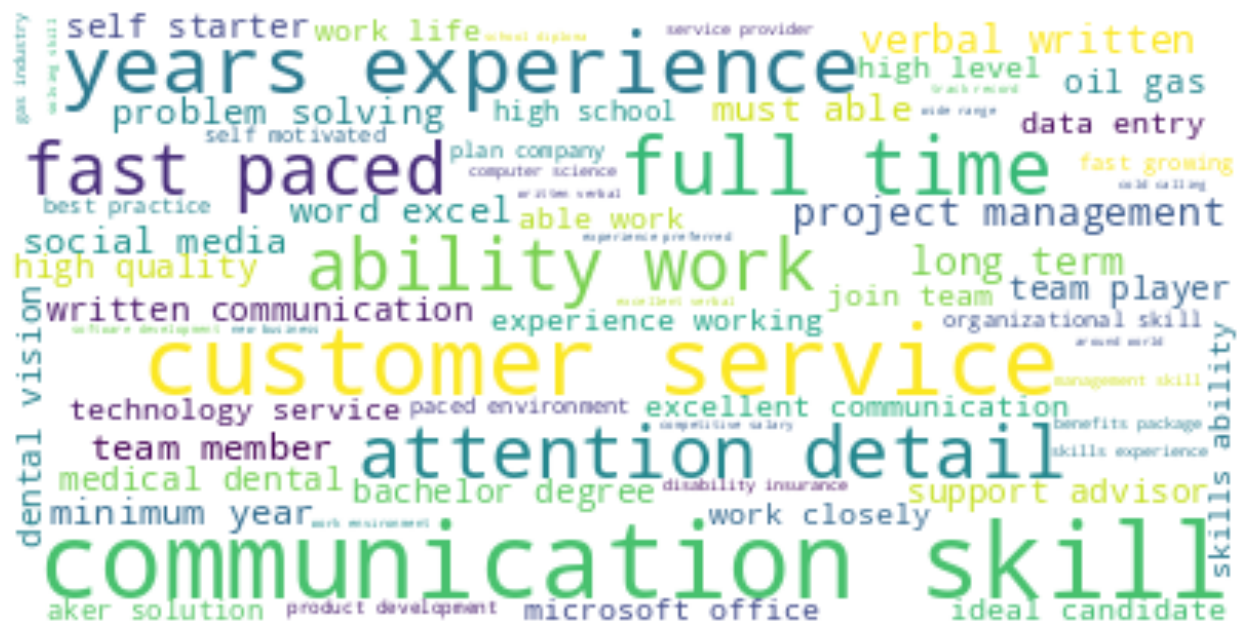

In [65]:
def join_words_temp(tokens):
    sentence = ' '.join(tokens)
    return sentence

# joining the tokenized words to provide as input to the TfidfVectorizer
df['temp'] = df['stopwords_removed'].apply(join_words_temp)
concatenated_text = ''.join(df['temp'])
df = df.drop(['temp'], axis=1)

wordcloud = WordCloud(background_color="white", max_font_size=100).generate(concatenated_text)      

# Plot WordCloud
plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# Save the plot to a file
plt.savefig('images/wordCloud.png')
plt.show()

In [66]:
def join_words(tokens):
    sentence = ' '.join(tokens)
    return sentence

# joining the tokenized words to provide as input to the TfidfVectorizer
df['stopwords_removed_joined'] = df['stopwords_removed'].apply(join_words)
df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,title_company_profile_description_requirements_benefits,clean_title_company_profile_description_requirements_benefits,tokenized,stopwords_removed,stopwords_removed_joined
0,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,US,"Marketing Intern <h3>We're Food52, and we've c...",marketing intern we are food and we have creat...,"[marketing, intern, we, are, food, and, we, ha...","[marketing, intern, food, created, groundbreak...",marketing intern food created groundbreaking a...
1,NaN,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,NZ,Customer Service - Cloud Video Production <h3>...,customer service cloud video production second...,"[customer, service, cloud, video, production, ...","[customer, service, cloud, video, production, ...",customer service cloud video production second...
2,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,US,Commissioning Machinery Assistant (CMA) <h3></...,commissioning machinery assistant cma valor se...,"[commissioning, machinery, assistant, cma, val...","[commissioning, machinery, assistant, cma, val...",commissioning machinery assistant cma valor se...
3,NaN,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,US,Account Executive - Washington DC <p>Our passi...,account executive washington dc our passion fo...,"[account, executive, washington, dc, our, pass...","[account, executive, washington, dc, passion, ...",account executive washington dc passion improv...
4,NaN,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,US,Bill Review Manager <p>SpotSource Solutions LL...,bill review manager spotsource solutions llc i...,"[bill, review, manager, spotsource, solutions,...","[bill, review, manager, spotsource, solutions,...",bill review manager spotsource solutions llc g...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,US,HSE Manager <p>The maintenance supervisor is ...,hse manager the maintenance supervisor is resp...,"[hse, manager, the, maintenance, supervisor, i...","[hse, manager, maintenance, supervisor, respon...",hse manager maintenance supervisor responsible...
4996,2000-3000,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,US,SAP Support Advisor <p>Colonial is looking fo...,sap support advisor colonial is looking for sh...,"[sap, support, advisor, colonial, is, looking,...","[sap, support, advisor, colonial, looking, sha...",sap support advisor colonial looking sharp peo...
4997,45000-70000,f,f,t,Contract,Mid-Senior level,NaN,Computer Software,Information Technology,t,US,"Informatica/ Etl Tester <p><img src=""#URL_8c6...",informatica etl tester managing over tb of dat...,"[informatica, etl, tester, managing, over, tb,...","[informatica, etl, tester, managing, tb, data,...",informatica etl tester managing tb data includ...
4998,65000-85000,f,t,f,NaN,Entry level,Master's Degree,NaN,NaN,t,US,SAP Support Advisor <p><i><b>With decades of e...,sap support advisor with decades of experience...,"[sap, support, advisor, with, decades, of, exp...","[sap, support, advisor, decades, experience, i...",sap support advisor decades experience industr...


## Syntactic Analysis - Applying POS tagging, extracting words based on POS and applying dependency parsing

In [67]:
def pos_based_extraction(input_text):

    # Tokenization
    tokens = word_tokenize(input_text)

    # Part-of-Speech (POS) Tagging
    pos_tags = pos_tag(tokens)
    # print(pos_tags)

    # Define chunk grammar to capture noun phrases (NP) and adjective phrases (ADJP)
    chunk_grammar = r"""
        NP: {<DT>?<JJ>?<NN>*<NNS>*<NNP>*<NNPS>*}                                     # Chunk Noun Phrases
        ADJP: {<VB>?<VBN>?<VBZ>?<VBP>?<VBG>?<VBD>?<VBZ>?<RB>?<RBR>?<RBS>?<JJ>+}      # Chunk Adjective Phrases
        VB: {<MD>?<VB>?<VBN>?<VBZ>?<VBP>?<VBG>?<VBD>?<RBR>?<RB>?<RBR>?<RBS>?}        # Chunk Verb Phrases
    """

    # Create chunk parser
    chunk_parser = RegexpParser(chunk_grammar)

    # Parse the POS-tagged text
    parsed_text = chunk_parser.parse(pos_tags)

    # Extract features from parsed chunks
    features = []
    for subtree in parsed_text.subtrees():
        if subtree.label() == 'NP' or subtree.label() == 'ADJP' or subtree.label() == 'VB':
            features.extend([word for word, tag in subtree.leaves()])

    # print("\nExtracted features:", features)
    
    return features

In [68]:
# def pos_based_extraction(input_text):
#     #Tokenization
#     tokens = word_tokenize(input_text)

#     # Part-of-Speech (POS) Tagging
#     pos_tags = pos_tag(tokens)
#     # print(pos_tags)
    
#     tags = []
#     for ele in pos_tags:
#         tags.append(ele[1])
        
#     return tags

In [69]:
df['pos'] = df['stopwords_removed_joined'].apply(pos_based_extraction)
df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,title_company_profile_description_requirements_benefits,clean_title_company_profile_description_requirements_benefits,tokenized,stopwords_removed,stopwords_removed_joined,pos
0,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,US,"Marketing Intern <h3>We're Food52, and we've c...",marketing intern we are food and we have creat...,"[marketing, intern, we, are, food, and, we, ha...","[marketing, intern, food, created, groundbreak...",marketing intern food created groundbreaking a...,"[marketing, intern, food, created, groundbreak..."
1,NaN,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,NZ,Customer Service - Cloud Video Production <h3>...,customer service cloud video production second...,"[customer, service, cloud, video, production, ...","[customer, service, cloud, video, production, ...",customer service cloud video production second...,"[customer, service, cloud, video, production, ..."
2,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,US,Commissioning Machinery Assistant (CMA) <h3></...,commissioning machinery assistant cma valor se...,"[commissioning, machinery, assistant, cma, val...","[commissioning, machinery, assistant, cma, val...",commissioning machinery assistant cma valor se...,"[commissioning, machinery, assistant, cma, val..."
3,NaN,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,US,Account Executive - Washington DC <p>Our passi...,account executive washington dc our passion fo...,"[account, executive, washington, dc, our, pass...","[account, executive, washington, dc, passion, ...",account executive washington dc passion improv...,"[account, executive, washington, dc, passion, ..."
4,NaN,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,US,Bill Review Manager <p>SpotSource Solutions LL...,bill review manager spotsource solutions llc i...,"[bill, review, manager, spotsource, solutions,...","[bill, review, manager, spotsource, solutions,...",bill review manager spotsource solutions llc g...,"[bill, review, manager, spotsource, solutions,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,US,HSE Manager <p>The maintenance supervisor is ...,hse manager the maintenance supervisor is resp...,"[hse, manager, the, maintenance, supervisor, i...","[hse, manager, maintenance, supervisor, respon...",hse manager maintenance supervisor responsible...,"[hse, manager, maintenance, supervisor, respon..."
4996,2000-3000,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,US,SAP Support Advisor <p>Colonial is looking fo...,sap support advisor colonial is looking for sh...,"[sap, support, advisor, colonial, is, looking,...","[sap, support, advisor, colonial, looking, sha...",sap support advisor colonial looking sharp peo...,"[sap, support, advisor, colonial, looking, sha..."
4997,45000-70000,f,f,t,Contract,Mid-Senior level,NaN,Computer Software,Information Technology,t,US,"Informatica/ Etl Tester <p><img src=""#URL_8c6...",informatica etl tester managing over tb of dat...,"[informatica, etl, tester, managing, over, tb,...","[informatica, etl, tester, managing, tb, data,...",informatica etl tester managing tb data includ...,"[informatica, etl, tester, managing, tb, data,..."
4998,65000-85000,f,t,f,NaN,Entry level,Master's Degree,NaN,NaN,t,US,SAP Support Advisor <p><i><b>With decades of e...,sap support advisor with decades of experience...,"[sap, support, advisor, with, decades, of, exp...","[sap, support, advisor, decades, experience, i...",sap support advisor decades experience industr...,"[sap, support, advisor, decades, experience, i..."


In [70]:
def ner_extraction(input_text):
    # Process the text with spaCy NER model
    doc = nlp(input_text)

    # Extract named entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    ner = []
    for entity in entities:
        ner.append(entity[1])
        
    return ner

In [71]:
df['ner'] = df['stopwords_removed_joined'].apply(ner_extraction)
df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,title_company_profile_description_requirements_benefits,clean_title_company_profile_description_requirements_benefits,tokenized,stopwords_removed,stopwords_removed_joined,pos,ner
0,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,US,"Marketing Intern <h3>We're Food52, and we've c...",marketing intern we are food and we have creat...,"[marketing, intern, we, are, food, and, we, ha...","[marketing, intern, food, created, groundbreak...",marketing intern food created groundbreaking a...,"[marketing, intern, food, created, groundbreak...","[CARDINAL, PERSON, PERSON, PERSON, GPE, ORG, D..."
1,NaN,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,NZ,Customer Service - Cloud Video Production <h3>...,customer service cloud video production second...,"[customer, service, cloud, video, production, ...","[customer, service, cloud, video, production, ...",customer service cloud video production second...,"[customer, service, cloud, video, production, ...","[TIME, TIME, TIME, ORG, ORG, GPE, GPE, TIME, P..."
2,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,US,Commissioning Machinery Assistant (CMA) <h3></...,commissioning machinery assistant cma valor se...,"[commissioning, machinery, assistant, cma, val...","[commissioning, machinery, assistant, cma, val...",commissioning machinery assistant cma valor se...,"[commissioning, machinery, assistant, cma, val...","[ORG, GPE, GPE, GPE, ORG]"
3,NaN,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,US,Account Executive - Washington DC <p>Our passi...,account executive washington dc our passion fo...,"[account, executive, washington, dc, our, pass...","[account, executive, washington, dc, passion, ...",account executive washington dc passion improv...,"[account, executive, washington, dc, passion, ...","[GPE, PERSON, CARDINAL, ORG, DATE, ORG, ORG, P..."
4,NaN,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,US,Bill Review Manager <p>SpotSource Solutions LL...,bill review manager spotsource solutions llc i...,"[bill, review, manager, spotsource, solutions,...","[bill, review, manager, spotsource, solutions,...",bill review manager spotsource solutions llc g...,"[bill, review, manager, spotsource, solutions,...","[ORG, ORG, GPE, GPE, PERSON, DATE, ORG, ORG, G..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,US,HSE Manager <p>The maintenance supervisor is ...,hse manager the maintenance supervisor is resp...,"[hse, manager, the, maintenance, supervisor, i...","[hse, manager, maintenance, supervisor, respon...",hse manager maintenance supervisor responsible...,"[hse, manager, maintenance, supervisor, respon...","[ORG, DATE, DATE, PERSON, PERSON]"
4996,2000-3000,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,US,SAP Support Advisor <p>Colonial is looking fo...,sap support advisor colonial is looking for sh...,"[sap, support, advisor, colonial, is, looking,...","[sap, support, advisor, colonial, looking, sha...",sap support advisor colonial looking sharp peo...,"[sap, support, advisor, colonial, looking, sha...","[GPE, DATE, DATE, ORG, ORG]"
4997,45000-70000,f,f,t,Contract,Mid-Senior level,NaN,Computer Software,Information Technology,t,US,"Informatica/ Etl Tester <p><img src=""#URL_8c6...",informatica etl tester managing over tb of dat...,"[informatica, etl, tester, managing, over, tb,...","[informatica, etl, tester, managing, tb, data,...",informatica etl tester managing tb data includ...,"[informatica, etl, tester, managing, tb, data,...","[ORG, ORG, CARDINAL, CARDINAL, CARDINAL, DATE,..."
4998,65000-85000,f,t,f,NaN,Entry level,Master's Degree,NaN,NaN,t,US,SAP Support Advisor <p><i><b>With decades of e...,sap support advisor with decades of experience...,"[sap, support,

In [72]:
def dependency_parsing(input_text):
    # Perform dependency parsing
    doc = nlp(input_text)


    # Extract relevant features from the dependency parse tree
    features = []
    for token in doc:
        features.append(token.dep_)
        
    return features


In [73]:
df['dep'] = df['stopwords_removed_joined'].apply(dependency_parsing)
df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,title_company_profile_description_requirements_benefits,clean_title_company_profile_description_requirements_benefits,tokenized,stopwords_removed,stopwords_removed_joined,pos,ner,dep
0,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,US,"Marketing Intern <h3>We're Food52, and we've c...",marketing intern we are food and we have creat...,"[marketing, intern, we, are, food, and, we, ha...","[marketing, intern, food, created, groundbreak...",marketing intern food created groundbreaking a...,"[marketing, intern, food, created, groundbreak...","[CARDINAL, PERSON, PERSON, PERSON, GPE, ORG, D...","[compound, compound, nsubj, csubj, compound, d..."
1,NaN,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,NZ,Customer Service - Cloud Video Production <h3>...,customer service cloud video production second...,"[customer, service, cloud, video, production, ...","[customer, service, cloud, video, production, ...",customer service cloud video production second...,"[customer, service, cloud, video, production, ...","[TIME, TIME, TIME, ORG, ORG, GPE, GPE, TIME, P...","[compound, compound, compound, compound, compo..."
2,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,US,Commissioning Machinery Assistant (CMA) <h3></...,commissioning machinery assistant cma valor se...,"[commissioning, machinery, assistant, cma, val...","[commissioning, machinery, assistant, cma, val...",commissioning machinery assistant cma valor se...,"[commissioning, machinery, assistant, cma, val...","[ORG, GPE, GPE, GPE, ORG]","[csubj, compound, compound, compound, compound..."
3,NaN,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,US,Account Executive - Washington DC <p>Our passi...,account executive washington dc our passion fo...,"[account, executive, washington, dc, our, pass...","[account, executive, washington, dc, passion, ...",account executive washington dc passion improv...,"[account, executive, washington, dc, passion, ...","[GPE, PERSON, CARDINAL, ORG, DATE, ORG, ORG, P...","[compound, compound, compound, compound, nsubj..."
4,NaN,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,US,Bill Review Manager <p>SpotSource Solutions LL...,bill review manager spotsource solutions llc i...,"[bill, review, manager, spotsource, solutions,...","[bill, review, manager, spotsource, solutions,...",bill review manager spotsource solutions llc g...,"[bill, review, manager, spotsource, solutions,...","[ORG, ORG, GPE, GPE, PERSON, DATE, ORG, ORG, G...","[compound, compound, compound, compound, nsubj..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,US,HSE Manager <p>The maintenance supervisor is ...,hse manager the maintenance supervisor is resp...,"[hse, manager, the, maintenance, supervisor, i...","[hse, manager, maintenance, supervisor, respon...",hse manager maintenance supervisor responsible...,"[hse, manager, maintenance, supervisor, respon...","[ORG, DATE, DATE, PERSON, PERSON]","[compound, compound, compound, nsubj, amod, co..."
4996,2000-3000,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,US,SAP Support Advisor <p>Colonial is looking fo...,sap support advisor colonial is looking for sh...,"[sap, support, advisor, colonial, is, looking,...","[sap, support, advisor, colonial, looking, sha...",sap support advisor colonial looking sharp peo...,"[sap, support, advisor, colonial, looking, sha...","[GPE, DATE, DATE, ORG, ORG]","[compound, compound, compound, nsubj, amod, am..."
4997,45000-70000,f,f,t,Contract,Mid-Senior level,NaN,Computer Software,Information Technology,t,US,"Informatica/ Etl Tester <p><img src=""#URL_8c6...",informatica etl tester managing over tb of dat...,"[informatica, etl, tester, managing, over, tb,...","[informatica, et

In [74]:
# Drop rows with empty lists in 'pos' and 'ner'
df = df[df['ner'].apply(lambda x: len(x) != 0)]
df = df[df['pos'].apply(lambda x: len(x) != 0)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22365 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   salary_range                                                   4610 non-null   object
 1   telecommuting                                                  22365 non-null  object
 2   has_company_logo                                               22365 non-null  object
 3   has_questions                                                  22365 non-null  object
 4   employment_type                                                18473 non-null  object
 5   required_experience                                            13329 non-null  object
 6   required_education                                             11270 non-null  object
 7   industry                                                       16482 non-

In [75]:
# joining the pos tags and NER 
df['pos_extracted_text'] = df['pos'].apply(join_words)
df['ner_tags'] = df['ner'].apply(join_words)
df['dep_tags'] = df['dep'].apply(join_words)

df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,...,clean_title_company_profile_description_requirements_benefits,tokenized,stopwords_removed,stopwords_removed_joined,pos,ner,dep,pos_extracted_text,ner_tags,dep_tags
0,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,...,marketing intern we are food and we have creat...,"[marketing, intern, we, are, food, and, we, ha...","[marketing, intern, food, created, groundbreak...",marketing intern food created groundbreaking a...,"[marketing, intern, food, created, groundbreak...","[CARDINAL, PERSON, PERSON, PERSON, GPE, ORG, D...","[compound, compound, nsubj, csubj, compound, d...",marketing intern food created groundbreaking a...,CARDINAL PERSON PERSON PERSON GPE ORG DATE ORG...,compound compound nsubj csubj compound dobj ad...
1,NaN,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,...,customer service cloud video production second...,"[customer, service, cloud, video, production, ...","[customer, service, cloud, video, production, ...",customer service cloud video production second...,"[customer, service, cloud, video, production, ...","[TIME, TIME, TIME, ORG, ORG, GPE, GPE, TIME, P...","[compound, compound, compound, compound, compo...",customer service cloud video production second...,TIME TIME TIME ORG ORG GPE GPE TIME PRODUCT OR...,compound compound compound compound compound c...
2,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,...,commissioning machinery assistant cma valor se...,"[commissioning, machinery, assistant, cma, val...","[commissioning, machinery, assistant, cma, val...",commissioning machinery assistant cma valor se...,"[commissioning, machinery, assistant, cma, val...","[ORG, GPE, GPE, GPE, ORG]","[csubj, compound, compound, compound, compound...",commissioning machinery assistant cma valor se...,ORG GPE GPE GPE ORG,csubj compound compound compound compound nsub...
3,NaN,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,...,account executive washington dc our passion fo...,"[account, executive, washington, dc, our, pass...","[account, executive, washington, dc, passion, ...",account executive washington dc passion improv...,"[account, executive, washington, dc, passion, ...","[GPE, PERSON, CARDINAL, ORG, DATE, ORG, ORG, P...","[compound, compound, compound, compound, nsubj...",account executive washington dc passion improv...,GPE PERSON CARDINAL ORG DATE ORG ORG PERSON CA...,compound compound compound compound nsubj acl ...
4,NaN,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,...,bill review manager spotsource solutions llc i...,"[bill, review, manager, spotsource, solutions,...","[bill, review, manager, spotsource, solutions,...",bill review manager spotsource solutions llc g...,"[bill, review, manager, spotsource, solutions,...","[ORG, ORG, GPE, GPE, PERSON, DATE, ORG, ORG, G...","[compound, compound, compound, compound, nsubj...",bill review manager spotsource solutions llc g...,ORG ORG GPE GPE PERSON DATE ORG ORG GPE ORG OR...,compound compound compound compound nsubj comp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,...,hse manager the maintenance supervisor is resp...,"[hse, manager, the, maintenance, supervisor, i...","[hse, manager, maintenance, supervisor, respon...",hse manager maintenance supervisor responsible...,"[hse, manager, maintenance, supervisor, respon...","[ORG, DATE, DATE, PERSON, PERSON]","[compound, compound, compound, nsubj, amod, co...",hse manager maintenance supervisor responsible...,ORG DATE DATE PERSON PERSON,compound compound compound nsubj amod compound...
4996,2000-3000,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,...,sap support advisor colonial is looking for sh...,"[sap, support, advisor, colonial, is, looking,...","[sap, support, 

In [76]:
df.clean_title_company_profile_description_requirements_benefits.values[0]

'marketing intern we are food and we have created a groundbreaking and award winning cooking site we support connect and celebrate home cooks and give them everything they need in one place we have a top editorial business and engineering team we are focused on using technology to find new and better ways to connect people around their specific food interests and to offer them superb highly curated information about food and cooking we attract the most talented home cooks and contributors in the country we also publish well known professionals like mario batali gwyneth paltrow and danny meyer and we have partnerships with whole foods market and random house food has been named the best food website by the james beard foundation and iacp and has been featured in the new york times npr pando daily techcrunch and on the today show we are located in chelsea in new york city food a fast growing james beard award winning online food community and crowd sourced and curated recipe hub is curre

In [77]:
df.pos_extracted_text.values[0]

'marketing intern food created groundbreaking award winning cooking site support connect celebrate home cooks give everything need place top editorial business engineering team focused using technology find new ways connect people specific food interests offer superb highly curated information food cooking attract talented home cooks contributors country also publish well known professionals mario batali gwyneth paltrow danny meyer partnerships whole foods market random house food named food website james beard foundation iacp featured new york times npr pando daily techcrunch today show located chelsea new york city food fast growing james beard winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid interns work small team editors executives developers new york city headquarters reproducing repackaging existing food content number partner sites huffington post yahoo buzzfeed various content management systems researching blogs websi

In [78]:
df.ner_tags.values[0]

'CARDINAL PERSON PERSON PERSON GPE ORG DATE ORG GPE PERSON GPE ORG ORG DATE PERSON'

In [79]:
df.dep_tags.values[0]

'compound compound nsubj csubj compound dobj advcl compound compound dobj dep compound compound dobj advcl dobj advcl nummod nmod amod amod compound compound nsubj conj xcomp dobj ROOT amod amod nsubj ccomp dobj prep amod compound pobj conj amod advmod amod compound compound dobj conj amod compound compound compound nsubj advmod ccomp advmod amod nsubj prep compound compound compound pobj compound compound appos amod nmod nmod amod compound nsubj acl amod compound compound compound compound compound nsubj conj compound compound compound compound compound compound dobj npadvmod nsubj advcl compound compound compound compound npadvmod advmod amod compound compound nsubj xcomp amod compound compound dobj acl amod compound dobj advmod acl amod compound npadvmod amod nsubj ccomp amod compound compound compound compound compound compound compound nsubj advcl xcomp amod compound compound compound compound compound compound compound dobj conj amod compound compound dobj acl compound dobj conj 

In [80]:
def stemmetizing_text(input_text):
    s = []
    for i in input_text.split():
        s.append(snow_stemmer.stem(i))
    return s

In [81]:
# Stemmatizing
snow_stemmer = nltk.stem.SnowballStemmer('english')

df['stemmatized_text'] = df['pos_extracted_text'].apply(stemmetizing_text)
df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,...,tokenized,stopwords_removed,stopwords_removed_joined,pos,ner,dep,pos_extracted_text,ner_tags,dep_tags,stemmatized_text
0,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,...,"[marketing, intern, we, are, food, and, we, ha...","[marketing, intern, food, created, groundbreak...",marketing intern food created groundbreaking a...,"[marketing, intern, food, created, groundbreak...","[CARDINAL, PERSON, PERSON, PERSON, GPE, ORG, D...","[compound, compound, nsubj, csubj, compound, d...",marketing intern food created groundbreaking a...,CARDINAL PERSON PERSON PERSON GPE ORG DATE ORG...,compound compound nsubj csubj compound dobj ad...,"[market, intern, food, creat, groundbreak, awa..."
1,NaN,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,...,"[customer, service, cloud, video, production, ...","[customer, service, cloud, video, production, ...",customer service cloud video production second...,"[customer, service, cloud, video, production, ...","[TIME, TIME, TIME, ORG, ORG, GPE, GPE, TIME, P...","[compound, compound, compound, compound, compo...",customer service cloud video production second...,TIME TIME TIME ORG ORG GPE GPE TIME PRODUCT OR...,compound compound compound compound compound c...,"[custom, servic, cloud, video, product, second..."
2,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,...,"[commissioning, machinery, assistant, cma, val...","[commissioning, machinery, assistant, cma, val...",commissioning machinery assistant cma valor se...,"[commissioning, machinery, assistant, cma, val...","[ORG, GPE, GPE, GPE, ORG]","[csubj, compound, compound, compound, compound...",commissioning machinery assistant cma valor se...,ORG GPE GPE GPE ORG,csubj compound compound compound compound nsub...,"[commiss, machineri, assist, cma, valor, servi..."
3,NaN,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,...,"[account, executive, washington, dc, our, pass...","[account, executive, washington, dc, passion, ...",account executive washington dc passion improv...,"[account, executive, washington, dc, passion, ...","[GPE, PERSON, CARDINAL, ORG, DATE, ORG, ORG, P...","[compound, compound, compound, compound, nsubj...",account executive washington dc passion improv...,GPE PERSON CARDINAL ORG DATE ORG ORG PERSON CA...,compound compound compound compound nsubj acl ...,"[account, execut, washington, dc, passion, imp..."
4,NaN,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,...,"[bill, review, manager, spotsource, solutions,...","[bill, review, manager, spotsource, solutions,...",bill review manager spotsource solutions llc g...,"[bill, review, manager, spotsource, solutions,...","[ORG, ORG, GPE, GPE, PERSON, DATE, ORG, ORG, G...","[compound, compound, compound, compound, nsubj...",bill review manager spotsource solutions llc g...,ORG ORG GPE GPE PERSON DATE ORG ORG GPE ORG OR...,compound compound compound compound nsubj comp...,"[bill, review, manag, spotsourc, solut, llc, g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,...,"[hse, manager, the, maintenance, supervisor, i...","[hse, manager, maintenance, supervisor, respon...",hse manager maintenance supervisor responsible...,"[hse, manager, maintenance, supervisor, respon...","[ORG, DATE, DATE, PERSON, PERSON]","[compound, compound, compound, nsubj, amod, co...",hse manager maintenance supervisor responsible...,ORG DATE DATE PERSON PERSON,compound compound compound nsubj amod compound...,"[hse, manag, mainten, supervisor, respons, pla..."
4996,2000-3000,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,...,"[sap, support, advisor, colonial, is, looking,...","[sap, support, advisor, colonial, looking, sha...",sap support advisor colonial looking sharp peo.

In [82]:
# joining the tokenized words
df['new_company_profile_description_requirements_benefits'] = df['stemmatized_text'].apply(join_words)
df

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,...,stopwords_removed,stopwords_removed_joined,pos,ner,dep,pos_extracted_text,ner_tags,dep_tags,stemmatized_text,new_company_profile_description_requirements_benefits
0,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,...,"[marketing, intern, food, created, groundbreak...",marketing intern food created groundbreaking a...,"[marketing, intern, food, created, groundbreak...","[CARDINAL, PERSON, PERSON, PERSON, GPE, ORG, D...","[compound, compound, nsubj, csubj, compound, d...",marketing intern food created groundbreaking a...,CARDINAL PERSON PERSON PERSON GPE ORG DATE ORG...,compound compound nsubj csubj compound dobj ad...,"[market, intern, food, creat, groundbreak, awa...",market intern food creat groundbreak award win...
1,NaN,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,...,"[customer, service, cloud, video, production, ...",customer service cloud video production second...,"[customer, service, cloud, video, production, ...","[TIME, TIME, TIME, ORG, ORG, GPE, GPE, TIME, P...","[compound, compound, compound, compound, compo...",customer service cloud video production second...,TIME TIME TIME ORG ORG GPE GPE TIME PRODUCT OR...,compound compound compound compound compound c...,"[custom, servic, cloud, video, product, second...",custom servic cloud video product second world...
2,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,...,"[commissioning, machinery, assistant, cma, val...",commissioning machinery assistant cma valor se...,"[commissioning, machinery, assistant, cma, val...","[ORG, GPE, GPE, GPE, ORG]","[csubj, compound, compound, compound, compound...",commissioning machinery assistant cma valor se...,ORG GPE GPE GPE ORG,csubj compound compound compound compound nsub...,"[commiss, machineri, assist, cma, valor, servi...",commiss machineri assist cma valor servic prov...
3,NaN,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,...,"[account, executive, washington, dc, passion, ...",account executive washington dc passion improv...,"[account, executive, washington, dc, passion, ...","[GPE, PERSON, CARDINAL, ORG, DATE, ORG, ORG, P...","[compound, compound, compound, compound, nsubj...",account executive washington dc passion improv...,GPE PERSON CARDINAL ORG DATE ORG ORG PERSON CA...,compound compound compound compound nsubj acl ...,"[account, execut, washington, dc, passion, imp...",account execut washington dc passion improv qu...
4,NaN,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,...,"[bill, review, manager, spotsource, solutions,...",bill review manager spotsource solutions llc g...,"[bill, review, manager, spotsource, solutions,...","[ORG, ORG, GPE, GPE, PERSON, DATE, ORG, ORG, G...","[compound, compound, compound, compound, nsubj...",bill review manager spotsource solutions llc g...,ORG ORG GPE GPE PERSON DATE ORG ORG GPE ORG OR...,compound compound compound compound nsubj comp...,"[bill, review, manag, spotsourc, solut, llc, g...",bill review manag spotsourc solut llc global h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,f,t,f,Full-time,NaN,NaN,Hospitality,Sales,t,...,"[hse, manager, maintenance, supervisor, respon...",hse manager maintenance supervisor responsible...,"[hse, manager, maintenance, supervisor, respon...","[ORG, DATE, DATE, PERSON, PERSON]","[compound, compound, compound, nsubj, amod, co...",hse manager maintenance supervisor responsible...,ORG DATE DATE PERSON PERSON,compound compound compound nsubj amod compound...,"[hse, manag, mainten, supervisor, respons, pla...",hse manag mainten supervisor respons plan over...
4996,2000-3000,f,f,t,Full-time,Entry level,NaN,Marketing and Advertising,NaN,t,...,"[sap, support, advisor, colonial, looking, sha...",sap support advisor colonial looking sharp peo...,"[sap, support, a

In [83]:
# We will drop all columns that is not required
df = df.drop(['salary_range', 'industry','title_company_profile_description_requirements_benefits',
              'tokenized', 'clean_title_company_profile_description_requirements_benefits', 'stemmatized_text', 
              'stopwords_removed_joined', 'stopwords_removed', 'pos', 'ner', 'pos_extracted_text', 'dep'], axis=1)

# Rename the column
df = df.rename(columns={'new_company_profile_description_requirements_benefits': 'title_company_profile_description_requirements_benefits'})
df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,country,ner_tags,dep_tags,title_company_profile_description_requirements_benefits
0,f,t,f,Other,Internship,NaN,Marketing,f,US,CARDINAL PERSON PERSON PERSON GPE ORG DATE ORG...,compound compound nsubj csubj compound dobj ad...,market intern food creat groundbreak award win...
1,f,t,f,Full-time,Not Applicable,NaN,Customer Service,f,NZ,TIME TIME TIME ORG ORG GPE GPE TIME PRODUCT OR...,compound compound compound compound compound c...,custom servic cloud video product second world...
2,f,t,f,NaN,NaN,NaN,NaN,f,US,ORG GPE GPE GPE ORG,csubj compound compound compound compound nsub...,commiss machineri assist cma valor servic prov...
3,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Sales,f,US,GPE PERSON CARDINAL ORG DATE ORG ORG PERSON CA...,compound compound compound compound nsubj acl ...,account execut washington dc passion improv qu...
4,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,f,US,ORG ORG GPE GPE PERSON DATE ORG ORG GPE ORG OR...,compound compound compound compound nsubj comp...,bill review manag spotsourc solut llc global h...
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,f,t,f,Full-time,NaN,NaN,Sales,t,US,ORG DATE DATE PERSON PERSON,compound compound compound nsubj amod compound...,hse manag mainten supervisor respons plan over...
4996,f,f,t,Full-time,Entry level,NaN,NaN,t,US,GPE DATE DATE ORG ORG,compound compound compound nsubj amod amod nsu...,sap support advisor coloni look sharp peopl in...
4997,f,f,t,Contract,Mid-Senior level,NaN,Information Technology,t,US,ORG ORG CARDINAL CARDINAL CARDINAL DATE CARDIN...,compound compound nsubj acl compound dobj prep...,informatica etl tester manag tb data includ we...
4998,f,t,f,NaN,Entry level,Master's Degree,NaN,t,US,DATE ORG DATE DATE DATE NORP PERSON,compound compound compound nsubj compound comp...,sap support advisor decad experi industri expe...


In [84]:
def lowerText(text):
    return text.lower()

df["ner_tags"] = df["ner_tags"].apply(lowerText)
df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,country,ner_tags,dep_tags,title_company_profile_description_requirements_benefits
0,f,t,f,Other,Internship,NaN,Marketing,f,US,cardinal person person person gpe org date org...,compound compound nsubj csubj compound dobj ad...,market intern food creat groundbreak award win...
1,f,t,f,Full-time,Not Applicable,NaN,Customer Service,f,NZ,time time time org org gpe gpe time product or...,compound compound compound compound compound c...,custom servic cloud video product second world...
2,f,t,f,NaN,NaN,NaN,NaN,f,US,org gpe gpe gpe org,csubj compound compound compound compound nsub...,commiss machineri assist cma valor servic prov...
3,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Sales,f,US,gpe person cardinal org date org org person ca...,compound compound compound compound nsubj acl ...,account execut washington dc passion improv qu...
4,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,f,US,org org gpe gpe person date org org gpe org or...,compound compound compound compound nsubj comp...,bill review manag spotsourc solut llc global h...
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,f,t,f,Full-time,NaN,NaN,Sales,t,US,org date date person person,compound compound compound nsubj amod compound...,hse manag mainten supervisor respons plan over...
4996,f,f,t,Full-time,Entry level,NaN,NaN,t,US,gpe date date org org,compound compound compound nsubj amod amod nsu...,sap support advisor coloni look sharp peopl in...
4997,f,f,t,Contract,Mid-Senior level,NaN,Information Technology,t,US,org org cardinal cardinal cardinal date cardin...,compound compound nsubj acl compound dobj prep...,informatica etl tester manag tb data includ we...
4998,f,t,f,NaN,Entry level,Master's Degree,NaN,t,US,date org date date date norp person,compound compound compound nsubj compound comp...,sap support advisor decad experi industri expe...


## Conversion text into vectors using word2ve model

In [85]:
from gensim.models import Word2Vec
import gensim.downloader as api
# wv = api.load('word2vec-google-news-300')

In [86]:
df['tokenized_text'] = df['title_company_profile_description_requirements_benefits'].str.split(' ')
df['tokenized_ner_tags'] = df['ner_tags'].str.split(' ')
df['tokenized_dep_tags'] = df['dep_tags'].str.split(' ')
df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,country,ner_tags,dep_tags,title_company_profile_description_requirements_benefits,tokenized_text,tokenized_ner_tags,tokenized_dep_tags
0,f,t,f,Other,Internship,NaN,Marketing,f,US,cardinal person person person gpe org date org...,compound compound nsubj csubj compound dobj ad...,market intern food creat groundbreak award win...,"[market, intern, food, creat, groundbreak, awa...","[cardinal, person, person, person, gpe, org, d...","[compound, compound, nsubj, csubj, compound, d..."
1,f,t,f,Full-time,Not Applicable,NaN,Customer Service,f,NZ,time time time org org gpe gpe time product or...,compound compound compound compound compound c...,custom servic cloud video product second world...,"[custom, servic, cloud, video, product, second...","[time, time, time, org, org, gpe, gpe, time, p...","[compound, compound, compound, compound, compo..."
2,f,t,f,NaN,NaN,NaN,NaN,f,US,org gpe gpe gpe org,csubj compound compound compound compound nsub...,commiss machineri assist cma valor servic prov...,"[commiss, machineri, assist, cma, valor, servi...","[org, gpe, gpe, gpe, org]","[csubj, compound, compound, compound, compound..."
3,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Sales,f,US,gpe person cardinal org date org org person ca...,compound compound compound compound nsubj acl ...,account execut washington dc passion improv qu...,"[account, execut, washington, dc, passion, imp...","[gpe, person, cardinal, org, date, org, org, p...","[compound, compound, compound, compound, nsubj..."
4,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,f,US,org org gpe gpe person date org org gpe org or...,compound compound compound compound nsubj comp...,bill review manag spotsourc solut llc global h...,"[bill, review, manag, spotsourc, solut, llc, g...","[org, org, gpe, gpe, person, date, org, org, g...","[compound, compound, compound, compound, nsubj..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,f,t,f,Full-time,NaN,NaN,Sales,t,US,org date date person person,compound compound compound nsubj amod compound...,hse manag mainten supervisor respons plan over...,"[hse, manag, mainten, supervisor, respons, pla...","[org, date, date, person, person]","[compound, compound, compound, nsubj, amod, co..."
4996,f,f,t,Full-time,Entry level,NaN,NaN,t,US,gpe date date org org,compound compound compound nsubj amod amod nsu...,sap support advisor coloni look sharp peopl in...,"[sap, support, advisor, coloni, look, sharp, p...","[gpe, date, date, org, org]","[compound, compound, compound, nsubj, amod, am..."
4997,f,f,t,Contract,Mid-Senior level,NaN,Information Technology,t,US,org org cardinal cardinal cardinal date cardin...,compound compound nsubj acl compound dobj prep...,informatica etl tester manag tb data includ we...,"[informatica, etl, tester, manag, tb, data, in...","[org, org, cardinal, cardinal, cardinal, date,...","[compound, compound, nsubj, acl, compound, dob..."
4998,f,t,f,NaN,Entry level,Master's Degree,NaN,t,US,date org date date date norp person,compound compound compound nsubj compound comp...,sap support advisor decad experi industri expe...,"[sap, support, advisor, decad, experi, industr...","[date, org, date, date, date, norp, person]","[compound, compound, compound, nsubj, compound..."


In [87]:
data_text = df.tokenized_text.values

# Train the Word2Vec model
model = Word2Vec(sentences=data_text, vector_size=300, window=5, min_count=1, workers=4)

# Save model
model.save("word2vec.model")

# Load model
model = Word2Vec.load("word2vec.model")

In [88]:
data_ner = df.tokenized_ner_tags.values

# Train the Word2Vec model
model_ner = Word2Vec(sentences=data_ner, vector_size=300, window=5, min_count=1, workers=4)

# Save model
model_ner.save("word2vec_ner.model")

# Load model
model_ner = Word2Vec.load("word2vec_ner.model")

In [89]:
data_dep = df.tokenized_dep_tags.values

# Train the Word2Vec model
model_dep = Word2Vec(sentences=data_dep, vector_size=300, window=5, min_count=1, workers=4)

# Save model
model_dep.save("word2vec_dep.model")

# Load model
model_dep = Word2Vec.load("word2vec_dep.model")

In [90]:
vector = model.wv['market']
vector

array([ 1.2890844 , -0.07211065,  0.6746374 , -1.4978046 ,  0.7295194 ,
       -2.0292115 ,  2.1220558 , -0.73247856,  1.4203889 ,  0.82226354,
        0.34434608, -0.17639062,  0.43948013,  0.39283922,  0.19216797,
        1.9384441 ,  0.20121898,  0.803268  , -0.27225325, -0.28768274,
       -0.19769591, -0.1874954 ,  0.56717145, -0.6400431 , -0.10993861,
        0.17603326, -0.8150827 , -0.74888057, -0.2144095 ,  1.0500789 ,
        1.7460907 ,  0.07903028, -0.19224903, -0.4532266 ,  0.12571903,
        2.096815  , -0.31610784,  0.18506451, -0.76509213,  0.04784448,
       -0.6063767 , -0.8288939 ,  0.78137076,  0.11954907,  0.54943746,
       -1.7783663 , -0.2049852 , -0.63078654, -0.24215049, -0.55286956,
       -0.35358799, -2.538494  ,  0.7335595 ,  0.5169951 ,  1.4615123 ,
        1.7493876 , -0.49035007,  2.586487  , -2.4049296 ,  1.1839151 ,
        0.83320624,  0.6591835 , -0.01637174,  1.9027897 ,  0.29591805,
        1.3005997 ,  1.2840309 , -0.19534732, -0.6942615 ,  0.26

In [91]:
vector.shape

(300,)

In [92]:
vector_ner = model_ner.wv['cardinal']
vector_ner

array([-2.98887901e-02, -4.86809947e-02,  6.29645810e-02, -3.56220044e-02,
       -1.10784741e-02,  1.17347138e-02, -3.75551987e-03,  1.27250940e-01,
        7.17365593e-02, -8.17162916e-02,  4.15838622e-02, -5.31591326e-02,
       -1.05032727e-01,  9.14920401e-03, -9.20682102e-02, -8.10561702e-02,
        9.64081287e-02, -2.76389271e-02,  4.64884415e-02, -2.52593141e-02,
       -2.23580673e-02,  1.22958347e-02,  7.36099482e-02,  1.06386296e-01,
        2.88565382e-02,  7.76648223e-02, -1.07357755e-01,  1.19826943e-01,
       -1.61945745e-02,  6.45869449e-02, -4.35293466e-02, -2.26690760e-03,
        4.87017483e-02, -1.50427492e-02, -6.88043535e-02, -6.25686496e-02,
       -8.52142498e-02, -9.14034396e-02, -3.40614025e-03, -2.00855713e-02,
       -3.06928381e-02,  1.15672380e-01, -2.81837396e-02, -6.04002625e-02,
       -7.35046566e-02, -8.15091804e-02,  6.01525158e-02, -1.88566037e-02,
       -9.72124860e-02,  1.01033017e-01,  6.69317916e-02, -1.16964011e-02,
       -5.91961555e-02, -

In [93]:
vector_ner.shape

(300,)

In [94]:
vector_dep = model_dep.wv['nsubj']
vector_dep

array([ 3.88909250e-01, -3.18549961e-01, -4.82969105e-01,  3.65106054e-02,
       -4.80085053e-02,  3.60192090e-01,  1.34462025e-02, -3.77179563e-01,
       -2.56480128e-02,  3.18779200e-01, -2.46276349e-01, -1.38667345e-01,
        2.41443478e-02, -2.98889458e-01,  6.10607974e-02,  3.83801281e-01,
        6.48991093e-02, -3.58709514e-01,  3.79846841e-01, -4.23268341e-02,
       -1.39016643e-01,  1.40804291e-01, -1.52515233e-01,  7.58449137e-02,
        4.59046125e-01,  1.24614030e-01, -5.17401338e-01,  3.09376925e-01,
        1.73279762e-01,  9.65699926e-02,  5.86759806e-01, -1.85182378e-01,
       -4.58788991e-01,  4.42948490e-02, -2.97235042e-01, -7.74267018e-02,
       -8.28489244e-01,  3.59461904e-01,  6.09202862e-01, -3.72834474e-01,
        1.94422245e-01, -2.18169793e-01,  7.88434129e-03,  2.63127029e-01,
       -4.50198889e-01,  1.30975649e-01, -3.85686129e-01,  2.41015658e-01,
       -5.09646237e-02,  1.40301853e-01,  1.91676691e-01,  8.58104154e-02,
        2.87716717e-01,  

In [95]:
vector_dep.shape

(300,)

In [96]:
def vectorize_sentence(input_text):
    doc = nlp(input_text)
    
    vectors = []
    for token in doc:
        if not (token.is_punct or token.is_stop):
            vectors.append(token.lemma_)
    
    return model.wv.get_mean_vector(vectors)



def vectorize_ner(input_text):
    doc = nlp(input_text)
    
    vectors = []
    for token in doc:
        if not (token.is_punct or token.is_stop):
            vectors.append(token.lemma_)
    
    return model_ner.wv.get_mean_vector(vectors)


def vectorize_dep(input_text):
    doc = nlp(input_text)
    
    vectors = []
    for token in doc:
        vectors.append(token.lemma_)
    
    return model_dep.wv.get_mean_vector(vectors)

In [97]:
ve_text = vectorize_sentence(df.title_company_profile_description_requirements_benefits.values[0])
print(ve_text.shape)
print(ve_text)

(300,)
[-1.35990744e-02 -1.17798252e-02 -9.31546744e-03 -1.45117855e-02
 -5.11601660e-03 -2.98633124e-03  3.27656977e-02 -8.09202029e-05
  2.61970498e-02  7.22535001e-03  2.14549229e-02 -2.12094877e-02
  2.26439945e-02 -1.32336309e-02  1.03241513e-02  1.39087960e-02
  3.92788323e-03 -4.95642005e-03 -6.88089943e-03  1.18096406e-02
  5.99628896e-04  6.14270195e-03  2.71006916e-02  8.34937021e-03
  5.96342888e-03 -6.95986440e-03 -2.76655592e-02  8.94521922e-03
 -5.98930195e-03 -1.66505501e-02  2.20621210e-02  3.75496247e-03
  1.38738449e-03  2.31133588e-03 -6.18164020e-04  1.51609490e-02
 -2.08230559e-02 -9.84776393e-03 -2.57285945e-02 -2.14688294e-03
 -1.05362367e-02  2.66083386e-02  9.51635651e-03 -1.60175236e-03
 -1.56697799e-02  6.19862135e-03 -2.38767881e-02 -6.18444942e-03
  4.60315077e-03  1.62681527e-02 -1.83974567e-03 -2.20943335e-02
  1.18552782e-02 -2.25560530e-03  1.08900405e-02 -5.08025615e-03
  1.04718534e-02  1.16710700e-02 -1.42362679e-03  1.86286382e-02
  1.15031237e-02  

In [98]:
ve_ner = vectorize_ner(df.ner_tags.values[0])
print(ve_ner.shape)
print(ve_ner)

(300,)
[-0.02413007 -0.03381532 -0.02953565  0.04704743 -0.07108996 -0.04890972
  0.00995854  0.03009896 -0.03197562 -0.01652452  0.04372553 -0.01404526
 -0.05220053  0.02543211 -0.06601305  0.04010779  0.02800339 -0.0379344
  0.00929381 -0.08843186  0.00638509  0.03610081  0.00649526  0.00123838
  0.04764565 -0.02517316 -0.02263392  0.01682872 -0.04888903 -0.04406113
  0.02082174  0.03745166  0.07643699  0.03839159 -0.05752623  0.02498411
  0.00840148 -0.01737572 -0.01082172  0.00936761 -0.0004537   0.03673753
 -0.03093664 -0.05749542  0.01698509  0.01093884 -0.02568235  0.04586659
  0.0074711   0.07131805 -0.00631269  0.07600185 -0.01374338  0.06788714
  0.03287521 -0.08076632 -0.00285222 -0.06481407 -0.01259337  0.00931995
 -0.01396626 -0.00495841  0.01751883 -0.02616645 -0.02108005 -0.01659713
 -0.06319014 -0.07619967 -0.01562941 -0.010283    0.00190691  0.06677093
 -0.04166012 -0.073511    0.03916492 -0.02564606  0.05399899 -0.02786006
  0.05035153 -0.00671656  0.04999268 -0.02541

In [99]:
ve_dep = vectorize_dep(df.dep_tags.values[0])
print(ve_dep.shape)
print(ve_dep)

(300,)
[-0.02004811 -0.01113315 -0.04671823 -0.03735839  0.00954559  0.00020439
 -0.01208539 -0.10708625 -0.00039052 -0.00032084 -0.01850423  0.05577685
  0.01023477 -0.02937433 -0.00585333  0.0389232  -0.05369278 -0.02052368
 -0.00591298 -0.0372574  -0.02504666 -0.00428817 -0.02910793 -0.03212816
 -0.01254414 -0.03207827 -0.01459672 -0.0475339  -0.01580116  0.0187101
  0.01331786  0.0343457  -0.04537513 -0.01562713 -0.03105547 -0.00209075
 -0.06148672  0.06317821  0.01758897  0.00496621  0.01446574  0.04335002
 -0.04131609  0.01442253  0.02518223 -0.04056206  0.01575955  0.02058857
  0.0020277   0.0460395   0.02889288  0.02798299  0.01709933 -0.01315029
  0.02036421 -0.02759089 -0.00888644  0.00859479 -0.02689811  0.00619459
 -0.02834802  0.00138094  0.0422827  -0.04284135 -0.06931559 -0.00048742
  0.04997564 -0.04547251  0.02722619 -0.04610277 -0.03111377  0.02592726
 -0.06198794 -0.02864552 -0.06473148 -0.01061578 -0.01189214 -0.04537778
  0.00432468 -0.00755141  0.03758996 -0.01295


#### Vectorizing the preprocessed text field using word2vec method

In [100]:
# def check(input_text):
#     doc = nlp(input_text)
    
#     vectors = []
#     for token in doc:
#         if not (token.is_punct or token.is_stop):
#             print(token.lemma_)
#             vectors.append(token.lemma_)
#     print()
#     return wv.get_mean_vector(vectors)

In [101]:
df['vector_pos'] = df['title_company_profile_description_requirements_benefits'].apply(vectorize_sentence)
df['vector_ner'] = df['ner_tags'].apply(vectorize_ner)
df['vector_dep'] = df['dep_tags'].apply(vectorize_dep)
df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,country,ner_tags,dep_tags,title_company_profile_description_requirements_benefits,tokenized_text,tokenized_ner_tags,tokenized_dep_tags,vector_pos,vector_ner,vector_dep
0,f,t,f,Other,Internship,NaN,Marketing,f,US,cardinal person person person gpe org date org...,compound compound nsubj csubj compound dobj ad...,market intern food creat groundbreak award win...,"[market, intern, food, creat, groundbreak, awa...","[cardinal, person, person, person, gpe, org, d...","[compound, compound, nsubj, csubj, compound, d...","[-0.013599074, -0.011779825, -0.009315467, -0....","[-0.02413007, -0.03381532, -0.029535653, 0.047...","[-0.020048106, -0.0111331465, -0.04671823, -0...."
1,f,t,f,Full-time,Not Applicable,NaN,Customer Service,f,NZ,time time time org org gpe gpe time product or...,compound compound compound compound compound c...,custom servic cloud video product second world...,"[custom, servic, cloud, video, product, second...","[time, time, time, org, org, gpe, gpe, time, p...","[compound, compound, compound, compound, compo...","[0.0035151574, -0.020131484, -0.004825604, 0.0...","[-0.003513874, -0.023308253, -0.020658003, 0.0...","[-0.012893268, -0.015181222, -0.04581399, -0.0..."
2,f,t,f,NaN,NaN,NaN,NaN,f,US,org gpe gpe gpe org,csubj compound compound compound compound nsub...,commiss machineri assist cma valor servic prov...,"[commiss, machineri, assist, cma, valor, servi...","[org, gpe, gpe, gpe, org]","[csubj, compound, compound, compound, compound...","[0.00024171718, -0.026304664, -0.019143382, -0...","[0.007197564, -0.02292176, -0.023131754, 0.041...","[-0.015177391, -0.016276373, -0.051096004, -0...."
3,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Sales,f,US,gpe person cardinal org date org org person ca...,compound compound compound compound nsubj acl ...,account execut washington dc passion improv qu...,"[account, execut, washington, dc, passion, imp...","[gpe, person, cardinal, org, date, org, org, p...","[compound, compound, compound, compound, nsubj...","[0.000706706, -0.020645507, -0.000108103835, -...","[-0.035222434, -0.025445629, -0.012425715, 0.0...","[-0.015807468, -0.01810854, -0.03946042, -0.03..."
4,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,f,US,org org gpe gpe person date org org gpe org or...,compound compound compound compound nsubj comp...,bill review manag spotsourc solut llc global h...,"[bill, review, manag, spotsourc, solut, llc, g...","[org, org, gpe, gpe, person, date, org, org, g...","[compound, compound, compound, compound, nsubj...","[0.0035891084, -0.025662223, -0.005697184, -0....","[-0.016413303, -0.019210255, -0.028259745, 0.0...","[-0.02682023, -0.008782862, -0.06134906, -0.04..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,f,t,f,Full-time,NaN,NaN,Sales,t,US,org date date person person,compound compound compound nsubj amod compound...,hse manag mainten supervisor respons plan over...,"[hse, manag, mainten, supervisor, respons, pla...","[org, date, date, person, person]","[compound, compound, compound, nsubj, amod, co...","[-0.008951613, -0.022621762, -0.006668255, -0....","[-0.03290627, -0.027020076, -0.037573885, 0.05...","[-0.009265143, -0.012692602, -0.04870605, -0.0..."
4996,f,f,t,Full-time,Entry level,NaN,NaN,t,US,gpe date date org org,compound compound compound nsubj amod amod nsu...,sap support advisor coloni look sharp peopl in...,"[sap, support, advisor, coloni, look, sharp, p...","[gpe, date, date, org, org]","[compound, compound, compound, nsubj, amod, am...","[0.0035627494, 0.013899377, 0.0018857606, -0.0...","[-0.011014424, -0.012747034, -0.026758855, 0.0...","[-0.021292819, -0.007877232, -0.072096035, -0...."
4997,f,f,t,Contract,Mid-Senior level,NaN,Information Technology,t,US,org org cardinal cardinal cardinal date cardin...,compound compound nsubj acl compound dobj prep...,informatica e

In [102]:
print(df.vector_pos.values[0].shape)
print(df.vector_ner.values[0].shape)
print(df.vector_dep.values[0].shape)


(300,)
(300,)
(300,)


#### Filling the NaN values of each column with corresponding values

In [103]:
df['employment_type'] = df['employment_type'].fillna('Other')
df['required_experience'] = df['required_experience'].fillna('Not Applicable')
df['function'] = df['function'].fillna('Other')
df['required_education'] = df['required_education'].fillna('Unspecified')
df['country'] = df['country'].fillna('Other')
df['telecommuting'] = df['telecommuting'].fillna('f')
df['has_company_logo'] = df['has_company_logo'].fillna('f')
df['has_questions'] = df['has_questions'].fillna('f')

df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,country,ner_tags,dep_tags,title_company_profile_description_requirements_benefits,tokenized_text,tokenized_ner_tags,tokenized_dep_tags,vector_pos,vector_ner,vector_dep
0,f,t,f,Other,Internship,Unspecified,Marketing,f,US,cardinal person person person gpe org date org...,compound compound nsubj csubj compound dobj ad...,market intern food creat groundbreak award win...,"[market, intern, food, creat, groundbreak, awa...","[cardinal, person, person, person, gpe, org, d...","[compound, compound, nsubj, csubj, compound, d...","[-0.013599074, -0.011779825, -0.009315467, -0....","[-0.02413007, -0.03381532, -0.029535653, 0.047...","[-0.020048106, -0.0111331465, -0.04671823, -0...."
1,f,t,f,Full-time,Not Applicable,Unspecified,Customer Service,f,NZ,time time time org org gpe gpe time product or...,compound compound compound compound compound c...,custom servic cloud video product second world...,"[custom, servic, cloud, video, product, second...","[time, time, time, org, org, gpe, gpe, time, p...","[compound, compound, compound, compound, compo...","[0.0035151574, -0.020131484, -0.004825604, 0.0...","[-0.003513874, -0.023308253, -0.020658003, 0.0...","[-0.012893268, -0.015181222, -0.04581399, -0.0..."
2,f,t,f,Other,Not Applicable,Unspecified,Other,f,US,org gpe gpe gpe org,csubj compound compound compound compound nsub...,commiss machineri assist cma valor servic prov...,"[commiss, machineri, assist, cma, valor, servi...","[org, gpe, gpe, gpe, org]","[csubj, compound, compound, compound, compound...","[0.00024171718, -0.026304664, -0.019143382, -0...","[0.007197564, -0.02292176, -0.023131754, 0.041...","[-0.015177391, -0.016276373, -0.051096004, -0...."
3,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Sales,f,US,gpe person cardinal org date org org person ca...,compound compound compound compound nsubj acl ...,account execut washington dc passion improv qu...,"[account, execut, washington, dc, passion, imp...","[gpe, person, cardinal, org, date, org, org, p...","[compound, compound, compound, compound, nsubj...","[0.000706706, -0.020645507, -0.000108103835, -...","[-0.035222434, -0.025445629, -0.012425715, 0.0...","[-0.015807468, -0.01810854, -0.03946042, -0.03..."
4,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,f,US,org org gpe gpe person date org org gpe org or...,compound compound compound compound nsubj comp...,bill review manag spotsourc solut llc global h...,"[bill, review, manag, spotsourc, solut, llc, g...","[org, org, gpe, gpe, person, date, org, org, g...","[compound, compound, compound, compound, nsubj...","[0.0035891084, -0.025662223, -0.005697184, -0....","[-0.016413303, -0.019210255, -0.028259745, 0.0...","[-0.02682023, -0.008782862, -0.06134906, -0.04..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,f,t,f,Full-time,Not Applicable,Unspecified,Sales,t,US,org date date person person,compound compound compound nsubj amod compound...,hse manag mainten supervisor respons plan over...,"[hse, manag, mainten, supervisor, respons, pla...","[org, date, date, person, person]","[compound, compound, compound, nsubj, amod, co...","[-0.008951613, -0.022621762, -0.006668255, -0....","[-0.03290627, -0.027020076, -0.037573885, 0.05...","[-0.009265143, -0.012692602, -0.04870605, -0.0..."
4996,f,f,t,Full-time,Entry level,Unspecified,Other,t,US,gpe date date org org,compound compound compound nsubj amod amod nsu...,sap support advisor coloni look sharp peopl in...,"[sap, support, advisor, coloni, look, sharp, p...","[gpe, date, date, org, org]","[compound, compound, compound, nsubj, amod, am...","[0.0035627494, 0.013899377, 0.0018857606, -0.0...","[-0.011014424, -0.012747034, -0.026758855, 0.0...","[-0.021292819, -0.007877232, -0.072096035, -0...."
4997,f,f,t,Contract,Mid-Senior level,Unspecified,Information Technology,t,US,org org cardinal cardinal cardinal da

In [104]:
# Remove indexing
df = df.reset_index(drop=True)
df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,country,ner_tags,dep_tags,title_company_profile_description_requirements_benefits,tokenized_text,tokenized_ner_tags,tokenized_dep_tags,vector_pos,vector_ner,vector_dep
0,f,t,f,Other,Internship,Unspecified,Marketing,f,US,cardinal person person person gpe org date org...,compound compound nsubj csubj compound dobj ad...,market intern food creat groundbreak award win...,"[market, intern, food, creat, groundbreak, awa...","[cardinal, person, person, person, gpe, org, d...","[compound, compound, nsubj, csubj, compound, d...","[-0.013599074, -0.011779825, -0.009315467, -0....","[-0.02413007, -0.03381532, -0.029535653, 0.047...","[-0.020048106, -0.0111331465, -0.04671823, -0...."
1,f,t,f,Full-time,Not Applicable,Unspecified,Customer Service,f,NZ,time time time org org gpe gpe time product or...,compound compound compound compound compound c...,custom servic cloud video product second world...,"[custom, servic, cloud, video, product, second...","[time, time, time, org, org, gpe, gpe, time, p...","[compound, compound, compound, compound, compo...","[0.0035151574, -0.020131484, -0.004825604, 0.0...","[-0.003513874, -0.023308253, -0.020658003, 0.0...","[-0.012893268, -0.015181222, -0.04581399, -0.0..."
2,f,t,f,Other,Not Applicable,Unspecified,Other,f,US,org gpe gpe gpe org,csubj compound compound compound compound nsub...,commiss machineri assist cma valor servic prov...,"[commiss, machineri, assist, cma, valor, servi...","[org, gpe, gpe, gpe, org]","[csubj, compound, compound, compound, compound...","[0.00024171718, -0.026304664, -0.019143382, -0...","[0.007197564, -0.02292176, -0.023131754, 0.041...","[-0.015177391, -0.016276373, -0.051096004, -0...."
3,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Sales,f,US,gpe person cardinal org date org org person ca...,compound compound compound compound nsubj acl ...,account execut washington dc passion improv qu...,"[account, execut, washington, dc, passion, imp...","[gpe, person, cardinal, org, date, org, org, p...","[compound, compound, compound, compound, nsubj...","[0.000706706, -0.020645507, -0.000108103835, -...","[-0.035222434, -0.025445629, -0.012425715, 0.0...","[-0.015807468, -0.01810854, -0.03946042, -0.03..."
4,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,f,US,org org gpe gpe person date org org gpe org or...,compound compound compound compound nsubj comp...,bill review manag spotsourc solut llc global h...,"[bill, review, manag, spotsourc, solut, llc, g...","[org, org, gpe, gpe, person, date, org, org, g...","[compound, compound, compound, compound, nsubj...","[0.0035891084, -0.025662223, -0.005697184, -0....","[-0.016413303, -0.019210255, -0.028259745, 0.0...","[-0.02682023, -0.008782862, -0.06134906, -0.04..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22360,f,t,f,Full-time,Not Applicable,Unspecified,Sales,t,US,org date date person person,compound compound compound nsubj amod compound...,hse manag mainten supervisor respons plan over...,"[hse, manag, mainten, supervisor, respons, pla...","[org, date, date, person, person]","[compound, compound, compound, nsubj, amod, co...","[-0.008951613, -0.022621762, -0.006668255, -0....","[-0.03290627, -0.027020076, -0.037573885, 0.05...","[-0.009265143, -0.012692602, -0.04870605, -0.0..."
22361,f,f,t,Full-time,Entry level,Unspecified,Other,t,US,gpe date date org org,compound compound compound nsubj amod amod nsu...,sap support advisor coloni look sharp peopl in...,"[sap, support, advisor, coloni, look, sharp, p...","[gpe, date, date, org, org]","[compound, compound, compound, nsubj, amod, am...","[0.0035627494, 0.013899377, 0.0018857606, -0.0...","[-0.011014424, -0.012747034, -0.026758855, 0.0...","[-0.021292819, -0.007877232, -0.072096035, -0...."
22362,f,f,t,Contract,Mid-Senior level,Unspecified,Information Technology,t,US,org org cardinal cardinal cardinal

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22365 entries, 0 to 22364
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   telecommuting                                            22365 non-null  object
 1   has_company_logo                                         22365 non-null  object
 2   has_questions                                            22365 non-null  object
 3   employment_type                                          22365 non-null  object
 4   required_experience                                      22365 non-null  object
 5   required_education                                       22365 non-null  object
 6   function                                                 22365 non-null  object
 7   fraudulent                                               22365 non-null  object
 8   country                             

#### Applying Label Encoder to encode the labels of rest of the columns 

In [106]:
# Define mapping from original values to user-specific encoded values
encoding_map_bool = {'f': 0, 't': 1}
encoding_map_employment_type = {'Other': 0, 'Full-time': 1, 'Part-time':2, 'Contract':3, 'Temporary':4}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding using mapping
df['telecommuting'] = df['telecommuting'].map(encoding_map_bool)
df['has_company_logo'] = df['has_company_logo'].map(encoding_map_bool)
df['has_questions'] = df['has_questions'].map(encoding_map_bool)
df['fraudulent'] = df['fraudulent'].map(encoding_map_bool)
df['employment_type'] = df['employment_type'].map(encoding_map_employment_type)

# Fit LabelEncoder and Transform
df['required_experience'] = label_encoder.fit_transform(df['required_experience']) 
df['required_education'] = label_encoder.fit_transform(df['required_education'])
df['function'] = label_encoder.fit_transform(df['function'])
df['country'] = label_encoder.fit_transform(df['country'])

df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,country,ner_tags,dep_tags,title_company_profile_description_requirements_benefits,tokenized_text,tokenized_ner_tags,tokenized_dep_tags,vector_pos,vector_ner,vector_dep
0,0,1,0,0,4,9,22,0,86,cardinal person person person gpe org date org...,compound compound nsubj csubj compound dobj ad...,market intern food creat groundbreak award win...,"[market, intern, food, creat, groundbreak, awa...","[cardinal, person, person, person, gpe, org, d...","[compound, compound, nsubj, csubj, compound, d...","[-0.013599074, -0.011779825, -0.009315467, -0....","[-0.02413007, -0.03381532, -0.029535653, 0.047...","[-0.020048106, -0.0111331465, -0.04671823, -0...."
1,0,1,0,1,6,9,7,0,60,time time time org org gpe gpe time product or...,compound compound compound compound compound c...,custom servic cloud video product second world...,"[custom, servic, cloud, video, product, second...","[time, time, time, org, org, gpe, gpe, time, p...","[compound, compound, compound, compound, compo...","[0.0035151574, -0.020131484, -0.004825604, 0.0...","[-0.003513874, -0.023308253, -0.020658003, 0.0...","[-0.012893268, -0.015181222, -0.04581399, -0.0..."
2,0,1,0,0,6,9,23,0,86,org gpe gpe gpe org,csubj compound compound compound compound nsub...,commiss machineri assist cma valor servic prov...,"[commiss, machineri, assist, cma, valor, servi...","[org, gpe, gpe, gpe, org]","[csubj, compound, compound, compound, compound...","[0.00024171718, -0.026304664, -0.019143382, -0...","[0.007197564, -0.02292176, -0.023131754, 0.041...","[-0.015177391, -0.016276373, -0.051096004, -0...."
3,0,1,0,1,5,1,31,0,86,gpe person cardinal org date org org person ca...,compound compound compound compound nsubj acl ...,account execut washington dc passion improv qu...,"[account, execut, washington, dc, passion, imp...","[gpe, person, cardinal, org, date, org, org, p...","[compound, compound, compound, compound, nsubj...","[0.000706706, -0.020645507, -0.000108103835, -...","[-0.035222434, -0.025445629, -0.012425715, 0.0...","[-0.015807468, -0.01810854, -0.03946042, -0.03..."
4,0,1,1,1,5,1,16,0,86,org org gpe gpe person date org org gpe org or...,compound compound compound compound nsubj comp...,bill review manag spotsourc solut llc global h...,"[bill, review, manag, spotsourc, solut, llc, g...","[org, org, gpe, gpe, person, date, org, org, g...","[compound, compound, compound, compound, nsubj...","[0.0035891084, -0.025662223, -0.005697184, -0....","[-0.016413303, -0.019210255, -0.028259745, 0.0...","[-0.02682023, -0.008782862, -0.06134906, -0.04..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22360,0,1,0,1,6,9,31,1,86,org date date person person,compound compound compound nsubj amod compound...,hse manag mainten supervisor respons plan over...,"[hse, manag, mainten, supervisor, respons, pla...","[org, date, date, person, person]","[compound, compound, compound, nsubj, amod, co...","[-0.008951613, -0.022621762, -0.006668255, -0....","[-0.03290627, -0.027020076, -0.037573885, 0.05...","[-0.009265143, -0.012692602, -0.04870605, -0.0..."
22361,0,0,1,1,2,9,23,1,86,gpe date date org org,compound compound compound nsubj amod amod nsu...,sap support advisor coloni look sharp peopl in...,"[sap, support, advisor, coloni, look, sharp, p...","[gpe, date, date, org, org]","[compound, compound, compound, nsubj, amod, am...","[0.0035627494, 0.013899377, 0.0018857606, -0.0...","[-0.011014424, -0.012747034, -0.026758855, 0.0...","[-0.021292819, -0.007877232, -0.072096035, -0...."
22362,0,0,1,3,5,9,18,1,86,org org cardinal cardinal cardinal date cardin...,compound compound nsubj acl compound dobj prep...,informatica etl tester manag tb data includ we...,"[informatica, etl, tester, manag, tb, data, in...","[org, org, cardinal, cardinal, cardinal, date,...","[compound, compound, nsubj, acl, compound, dob...","[-0.010371576, -0.0022791617, -0.01214515, 0.0...

In [107]:
num_cols = 300  # Specify the number of components you want
cols_name_pos = [f"P{i}" for i in range(1, num_cols + 1)]
cols_name_ner = [f"N{i}" for i in range(1, num_cols + 1)]
cols_name_dep = [f"D{i}" for i in range(1, num_cols + 1)]

print(cols_name_pos)
print()
print(cols_name_ner)
print()
print(cols_name_dep)

['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P60', 'P61', 'P62', 'P63', 'P64', 'P65', 'P66', 'P67', 'P68', 'P69', 'P70', 'P71', 'P72', 'P73', 'P74', 'P75', 'P76', 'P77', 'P78', 'P79', 'P80', 'P81', 'P82', 'P83', 'P84', 'P85', 'P86', 'P87', 'P88', 'P89', 'P90', 'P91', 'P92', 'P93', 'P94', 'P95', 'P96', 'P97', 'P98', 'P99', 'P100', 'P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108', 'P109', 'P110', 'P111', 'P112', 'P113', 'P114', 'P115', 'P116', 'P117', 'P118', 'P119', 'P120', 'P121', 'P122', 'P123', 'P124', 'P125', 'P126', 'P127', 'P128', 'P129', 'P130', 'P131', 'P132', 'P133', 'P134', 'P135', 'P136', 'P137', 'P138', 'P1

In [108]:
df[cols_name_pos] = pd.DataFrame(df.vector_pos.values.tolist(), index= df.index)
df[cols_name_ner] = pd.DataFrame(df.vector_ner.values.tolist(), index= df.index)
df[cols_name_dep] = pd.DataFrame(df.vector_dep.values.tolist(), index= df.index)

In [109]:
df = df.drop(['ner_tags', 'dep_tags', 'tokenized_text', 'tokenized_ner_tags','tokenized_dep_tags', 'title_company_profile_description_requirements_benefits','vector_pos', 'vector_ner','vector_dep'], axis=1)
df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,country,P1,...,D291,D292,D293,D294,D295,D296,D297,D298,D299,D300
0,0,1,0,0,4,9,22,0,86,-0.013599,...,-0.026178,-0.015082,-0.011212,0.015440,-0.018357,-0.046992,-0.055242,-0.015124,-0.022934,-0.013377
1,0,1,0,1,6,9,7,0,60,0.003515,...,-0.018610,-0.012218,-0.011881,0.008807,-0.012834,-0.044243,-0.043911,-0.011710,-0.023302,-0.009958
2,0,1,0,0,6,9,23,0,86,0.000242,...,-0.017192,-0.014984,-0.014271,0.005953,-0.010885,-0.046679,-0.046188,-0.012064,-0.024477,-0.006686
3,0,1,0,1,5,1,31,0,86,0.000707,...,-0.021199,-0.013562,-0.013078,0.008239,-0.011064,-0.049551,-0.045483,-0.012892,-0.024372,-0.005558
4,0,1,1,1,5,1,16,0,86,0.003589,...,-0.024960,-0.021977,-0.014568,0.006722,-0.022886,-0.057115,-0.058410,-0.014244,-0.024430,-0.007884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22360,0,1,0,1,6,9,31,1,86,-0.008952,...,-0.019298,-0.007653,-0.009488,0.010319,-0.009182,-0.043504,-0.040281,-0.009688,-0.020480,-0.007624
22361,0,0,1,1,2,9,23,1,86,0.003563,...,-0.022979,-0.019290,-0.015007,0.008594,-0.021324,-0.057831,-0.055061,-0.011441,-0.026363,-0.006764
22362,0,0,1,3,5,9,18,1,86,-0.010372,...,-0.021259,-0.010289,-0.012655,0.007088,-0.007941,-0.048911,-0.040745,-0.012005,-0.025188,-0.007778
22363,0,1,0,0,2,5,23,1,86,0.004437,...,-0.015846,-0.004892,-0.010282,0.007224,0.002759,-0.049988,-0.040416,-0.012971,-0.025271,-0.006578


In [110]:
print(df.shape)

(22365, 909)


In [111]:
df.to_csv("features_pos_ner_dep.csv", index=False)

In [112]:
# Shuffle the rows
df = df.sample(frac=1).reset_index(drop=True)

# Split the DataFrame into training and testing sets
temp_train_df, temp_test_df = train_test_split(df, test_size=0.2, random_state=42)

In [113]:
train_df, val_df = train_test_split(temp_train_df, test_size=0.2, random_state=42)

In [114]:
train_df_targets = train_df['fraudulent']
val_df_targets = val_df['fraudulent']
test_df_targets = temp_test_df['fraudulent']

train_df = train_df.drop(columns=['fraudulent'])
val_df = val_df.drop(columns=['fraudulent'])
test_df = temp_test_df.drop(columns=['fraudulent'])

In [115]:
cols_list = ['required_experience', 'required_education', 'function', 'country'] + cols_name_pos + cols_name_ner + cols_name_dep

In [116]:
class Standardizer:
    def __init__(self, mean, stdev):
        self.mean = mean
        self.stdev = stdev
    def scale(self, x):
        return (x - self.mean)/self.stdev

In [117]:
for feature in cols_list:
    train_df[feature] = train_df[feature].apply(Standardizer(train_df[feature].mean(), train_df[feature].std()).scale)
    
for feature in cols_list:
    val_df[feature] = val_df[feature].apply(Standardizer(val_df[feature].mean(), val_df[feature].std()).scale)
    
for feature in cols_list:
    test_df[feature] = test_df[feature].apply(Standardizer(test_df[feature].mean(), test_df[feature].std()).scale)

## Deep Learning Model

In [118]:
# Convert data to TensorFlow tensors
train_inputs_tensor = tf.convert_to_tensor(train_df, dtype=tf.float32)
train_targets_tensor = tf.convert_to_tensor(train_df_targets, dtype=tf.int32)

val_inputs_tensor = tf.convert_to_tensor(val_df, dtype=tf.float32)
val_targets_tensor = tf.convert_to_tensor(val_df_targets, dtype=tf.int32)

test_inputs_tensor = tf.convert_to_tensor(test_df, dtype=tf.float32)
test_targets_tensor = tf.convert_to_tensor(test_df_targets, dtype=tf.int32)

## Artificial Neural Network Model

In [119]:
input_size = 908
output_classes = 2

In [120]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(input_size,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output_classes, activation='softmax')
])


# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               465408    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 535266 (2.04 MB)
Trainable params: 535266 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
# Compile the model with validation accuracy and early stopping
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [122]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

# Define model checkpoint callback to save the best model
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model_ann.keras', 
                                                      monitor='val_accuracy', 
                                                      save_best_only=True, 
                                                      mode='max', 
                                                      verbose=1)

In [123]:
# Train the model with early stopping
history = model.fit(train_inputs_tensor, train_targets_tensor, 
                    epochs=30, 
                    validation_data=(val_inputs_tensor, val_targets_tensor), 
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/30


I0000 00:00:1713184050.501777     189 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


448/448 [==============================] - ETA: 0s - loss: 0.1994 - accuracy: 0.9259
Epoch 1: val_accuracy improved from -inf to 0.95697, saving model to best_model_ann.keras
448/448 [==============================] - 4s 4ms/step - loss: 0.1994 - accuracy: 0.9259 - val_loss: 0.1219 - val_accuracy: 0.9570
Epoch 2/30
446/448 [============================>.] - ETA: 0s - loss: 0.1176 - accuracy: 0.9594
Epoch 2: val_accuracy improved from 0.95697 to 0.96424, saving model to best_model_ann.keras
448/448 [==============================] - 2s 4ms/step - loss: 0.1175 - accuracy: 0.9594 - val_loss: 0.1091 - val_accuracy: 0.9642
Epoch 3/30
443/448 [============================>.] - ETA: 0s - loss: 0.0875 - accuracy: 0.9711
Epoch 3: val_accuracy did not improve from 0.96424
448/448 [==============================] - 2s 4ms/step - loss: 0.0870 - accuracy: 0.9712 - val_loss: 0.1226 - val_accuracy: 0.9628
Epoch 4/30
436/448 [============================>.] - ETA: 0s - loss: 0.0708 - accuracy: 0.9743


In [124]:
# Load the saved model
model = load_model("/kaggle/working/best_model_ann.keras")

In [125]:
# Assuming X_test contains the test data
# Make predictions on the test data
predictions = model.predict(test_inputs_tensor)

# predictions contain the probability distribution over classes for each sample
# To get the predicted class labels, you can use argmax
predicted_labels = tf.argmax(predictions, axis=1)

# Print the predicted labels
print(predicted_labels)

140/140 [==============================] - 0s 2ms/step
tf.Tensor([0 0 1 ... 0 0 0], shape=(4473,), dtype=int64)


In [126]:
# Calculate accuracy
accuracy_mlp = accuracy_score(test_targets_tensor, predicted_labels)
print("Accuracy:", accuracy_mlp)

# Calculate F1 score
f1_mlp = f1_score(test_targets_tensor, predicted_labels)
print("F1 Score:", f1_mlp)

# Print classification report
print("Classification Report:")
print(classification_report(test_targets_tensor, predicted_labels))

Accuracy: 0.9767493852000895
F1 Score: 0.9528985507246376
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3350
           1       0.97      0.94      0.95      1123

    accuracy                           0.98      4473
   macro avg       0.97      0.96      0.97      4473
weighted avg       0.98      0.98      0.98      4473



## Bi-directional GRU (BGRU)

In [127]:
sequence_length = 256
input_dim = 1
output_classes = 2

In [128]:
# Assuming train_inputs_tensor and val_inputs_tensor are your input sequences
# Pad or truncate sequences to the desired length (sequence_length)
train_inputs_padded = pad_sequences(train_inputs_tensor, maxlen=sequence_length, padding='post', truncating='post')
val_inputs_padded = pad_sequences(val_inputs_tensor, maxlen=sequence_length, padding='post', truncating='post')
test_inputs_padded = pad_sequences(test_inputs_tensor, maxlen=sequence_length, padding='post', truncating='post')

In [129]:
# Define input shape and number of units
input_shape = (sequence_length, input_dim)  # Define your input shape
num_units = 64  # Number of units in each GRU layer


# Define the model architecture
model_bgru = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(num_units, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(num_units)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.GRU(num_units)),
    tf.keras.layers.Dense(output_classes, activation='softmax')
])



# Print the model summary
model_bgru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 256, 128)          25728     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 100482 (392.51 KB)
Trainable params: 100482 (392.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
# Compile the model
model_bgru.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [131]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

# Define model checkpoint callback to save the best model
model_checkpoint_bgru = tf.keras.callbacks.ModelCheckpoint('best_model_bgru.keras', 
                                                      monitor='val_accuracy', 
                                                      save_best_only=True, 
                                                      mode='max', 
                                                      verbose=1)

In [132]:
# Train the model with early stopping
history_bgru = model_bgru.fit(train_inputs_padded, train_targets_tensor, 
                         epochs=30, 
                         validation_data=(val_inputs_padded, val_targets_tensor), 
                         callbacks=[early_stopping, model_checkpoint_bgru])

Epoch 1/30
447/448 [============================>.] - ETA: 0s - loss: 0.4197 - accuracy: 0.8039
Epoch 1: val_accuracy improved from -inf to 0.85052, saving model to best_model_bgru.keras
448/448 [==============================] - 22s 34ms/step - loss: 0.4195 - accuracy: 0.8040 - val_loss: 0.3449 - val_accuracy: 0.8505
Epoch 2/30
447/448 [============================>.] - ETA: 0s - loss: 0.3284 - accuracy: 0.8613
Epoch 2: val_accuracy improved from 0.85052 to 0.88237, saving model to best_model_bgru.keras
448/448 [==============================] - 14s 31ms/step - loss: 0.3286 - accuracy: 0.8612 - val_loss: 0.2961 - val_accuracy: 0.8824
Epoch 3/30
447/448 [============================>.] - ETA: 0s - loss: 0.2854 - accuracy: 0.8795
Epoch 3: val_accuracy improved from 0.88237 to 0.89299, saving model to best_model_bgru.keras
448/448 [==============================] - 14s 31ms/step - loss: 0.2856 - accuracy: 0.8793 - val_loss: 0.2624 - val_accuracy: 0.8930
Epoch 4/30
447/448 [==============

In [133]:
# Load the saved model
model_bgru = load_model("/kaggle/working/best_model_bgru.keras")

In [134]:
# Assuming X_test contains the test data
# Make predictions on the test data
predictions_bgru = model_bgru.predict(test_inputs_padded)

# predictions contain the probability distribution over classes for each sample
# To get the predicted class labels, you can use argmax
predicted_labels_bgru = tf.argmax(predictions_bgru, axis=1)

# Print the predicted labels
print(predicted_labels_bgru)

140/140 [==============================] - 3s 13ms/step
tf.Tensor([0 0 1 ... 0 0 0], shape=(4473,), dtype=int64)


In [135]:
# Calculate accuracy
accuracy_bgru = accuracy_score(test_targets_tensor, predicted_labels_bgru)
print("Accuracy:", accuracy_bgru)

# Calculate F1 score
f1_bgru = f1_score(test_targets_tensor, predicted_labels_bgru)
print("F1 Score:", f1_bgru)

# Print classification report
print("Classification Report:")
print(classification_report(test_targets_tensor, predicted_labels_bgru))

Accuracy: 0.9197406662195394
F1 Score: 0.8288030519790176
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3350
           1       0.89      0.77      0.83      1123

    accuracy                           0.92      4473
   macro avg       0.91      0.87      0.89      4473
weighted avg       0.92      0.92      0.92      4473



## Gated Recurrent Unit(GRU)

In [136]:
# Define input shape and number of units
input_shape = (sequence_length, input_dim)  # Define your input shape
num_units = 64  # Number of units in each GRU layer

# Define the model architecture
model_gru = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.GRU(num_units, return_sequences=True),
    tf.keras.layers.GRU(num_units),
    tf.keras.layers.Dense(output_classes, activation='softmax')
])


# Print the model summary
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 256, 64)           12864     
                                                                 
 gru_3 (GRU)                 (None, 64)                24960     
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 37954 (148.26 KB)
Trainable params: 37954 (148.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
# Compile the model
model_gru.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [138]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

# Define model checkpoint callback to save the best model
model_checkpoint_gru = tf.keras.callbacks.ModelCheckpoint('best_model_gru.keras', 
                                                           monitor='val_accuracy', 
                                                           save_best_only=True, 
                                                           mode='max', 
                                                           verbose=1)

In [139]:
# Train the model with early stopping
history_gru = model_gru.fit(train_inputs_padded, train_targets_tensor, 
                         epochs=30, 
                         validation_data=(val_inputs_padded, val_targets_tensor), 
                         callbacks=[early_stopping, model_checkpoint_gru])

Epoch 1/30
445/448 [============================>.] - ETA: 0s - loss: 0.4958 - accuracy: 0.7534
Epoch 1: val_accuracy improved from -inf to 0.77172, saving model to best_model_gru.keras
448/448 [==============================] - 12s 19ms/step - loss: 0.4952 - accuracy: 0.7534 - val_loss: 0.4534 - val_accuracy: 0.7717
Epoch 2/30
448/448 [==============================] - ETA: 0s - loss: 0.4113 - accuracy: 0.8093
Epoch 2: val_accuracy improved from 0.77172 to 0.83236, saving model to best_model_gru.keras
448/448 [==============================] - 8s 17ms/step - loss: 0.4113 - accuracy: 0.8093 - val_loss: 0.3588 - val_accuracy: 0.8324
Epoch 3/30
448/448 [==============================] - ETA: 0s - loss: 0.3597 - accuracy: 0.8452
Epoch 3: val_accuracy improved from 0.83236 to 0.84884, saving model to best_model_gru.keras
448/448 [==============================] - 8s 17ms/step - loss: 0.3597 - accuracy: 0.8452 - val_loss: 0.3434 - val_accuracy: 0.8488
Epoch 4/30
448/448 [===================

In [140]:
# Load the saved model
model_gru = load_model("/kaggle/working/best_model_gru.keras")

In [141]:
# Assuming X_test contains the test data
# Make predictions on the test data
predictions_gru = model_gru.predict(test_inputs_padded)

# predictions contain the probability distribution over classes for each sample
# To get the predicted class labels, you can use argmax
predicted_labels_gru = tf.argmax(predictions_gru, axis=1)

# Print the predicted labels
print(predicted_labels_gru)

140/140 [==============================] - 2s 8ms/step
tf.Tensor([0 0 1 ... 0 0 0], shape=(4473,), dtype=int64)


In [142]:
# Calculate accuracy
accuracy_gru = accuracy_score(test_targets_tensor, predicted_labels_gru)
print("Accuracy:", accuracy_gru)

# Calculate F1 score
f1_gru = f1_score(test_targets_tensor, predicted_labels_gru)
print("F1 Score:", f1_gru)

# Print classification report
print("Classification Report:")
print(classification_report(test_targets_tensor, predicted_labels_gru))

Accuracy: 0.8964900514196289
F1 Score: 0.781500707881076
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3350
           1       0.83      0.74      0.78      1123

    accuracy                           0.90      4473
   macro avg       0.87      0.84      0.86      4473
weighted avg       0.89      0.90      0.89      4473



## Machine learning Models

In [143]:
train_df_targets = temp_train_df['fraudulent']
test_df_targets = temp_test_df['fraudulent']

train_df = temp_train_df.drop(columns=['fraudulent'])
test_df = temp_test_df.drop(columns=['fraudulent'])

In [144]:
for feature in cols_list:
    train_df[feature] = train_df[feature].apply(Standardizer(train_df[feature].mean(), train_df[feature].std()).scale)
    
for feature in cols_list:
    test_df[feature] = test_df[feature].apply(Standardizer(test_df[feature].mean(), test_df[feature].std()).scale)

In [145]:
train_df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,country,P1,P2,...,D291,D292,D293,D294,D295,D296,D297,D298,D299,D300
2455,0,0,1,0,0.799150,0.817278,-1.373106,0.646509,-0.490377,0.319904,...,0.905233,1.007511,0.648705,1.416061,0.391912,0.812748,0.321018,0.483828,0.100413,-1.721557
5871,0,1,1,1,0.341074,-1.452938,0.798435,-1.581542,-1.375307,0.175828,...,-0.708078,-0.093941,0.096570,-0.475972,0.274396,-0.520142,-0.092702,0.167231,0.229416,0.701289
5504,0,1,0,1,0.799150,0.817278,-0.769900,0.646509,-0.171303,-0.797763,...,1.058180,-0.182715,-0.455480,-0.514350,0.078787,-0.000916,0.028343,0.123192,-0.103034,0.061084
137,0,1,1,1,0.341074,-1.452938,1.522283,0.646509,-0.341928,-0.166077,...,0.819431,1.041707,0.964574,0.679303,0.966117,0.803248,1.093143,0.647514,-0.102454,-0.682590
12725,0,0,0,1,0.799150,-0.601607,0.557153,0.646509,-0.191749,-1.104601,...,-0.988084,0.052835,0.347533,0.779491,-0.447163,0.001853,-0.479896,-0.140478,0.792501,-0.749998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0,1,0,0,0.799150,0.817278,0.557153,0.646509,0.382310,-0.674632,...,1.455939,0.491874,-0.790203,-0.465674,0.848791,0.374018,0.766781,-0.124062,-0.720872,0.579735
21575,0,1,1,1,0.341074,-1.452938,1.522283,-1.470139,0.991969,2.212507,...,-1.225564,-1.355917,-0.633868,-0.781450,-1.103677,-1.102876,-1.133756,-0.912867,0.491809,0.404323
5390,0,1,1,1,0.799150,0.817278,-0.769900,0.646509,1.017918,0.222049,...,-0.748192,-0.189605,0.412741,0.314489,-0.723086,-0.057170,-0.718469,-0.510691,0.414189,-0.347334
860,0,1,1,1,0.799150,0.817278,-0.769900,0.646509,-1.092573,0.903413,...,1.251370,0.971100,0.344782,-0.214392,1.154848,0.437898,1.391186,0.928623,-0.412576,0.197889


In [146]:
test_df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,country,P1,P2,...,D291,D292,D293,D294,D295,D296,D297,D298,D299,D300
15414,0,1,0,1,0.337532,-1.457655,-0.047542,-1.272340,-1.212358,-0.479664,...,-0.625667,-1.058941,-1.166176,-0.111586,-1.649139,-0.298063,-0.796340,-0.366191,0.321005,-0.632876
4678,0,1,1,1,-1.043364,-0.604501,0.550482,0.619661,0.247145,1.441843,...,1.419464,1.401618,0.721582,0.067516,1.249125,0.754152,1.465554,0.601319,-0.517635,0.172385
7911,0,0,1,2,-1.963961,0.817424,0.550482,0.619661,-0.418391,-1.389161,...,-0.394240,-0.377690,-0.131898,0.167253,-0.323617,0.047516,-0.379692,0.070626,0.374334,0.253676
21601,0,1,1,1,-1.963961,0.817424,1.507320,-1.612900,-0.328221,-0.725547,...,0.534915,0.790975,1.350267,1.212546,-0.056393,1.798466,1.442884,1.763517,2.266947,-1.212977
5732,0,1,1,3,-1.043364,-1.457655,-0.884776,0.619661,0.895566,2.561140,...,-0.764080,0.480878,2.615254,2.471533,-0.683293,1.886294,0.948461,2.512225,2.607846,-1.611049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,0,0,1,1,0.797830,0.817424,-0.765171,0.619661,-1.509437,0.996274,...,-0.662402,-1.739232,-2.249318,-2.977108,-0.622597,-2.494486,-1.282849,-1.951050,-0.920689,2.746991
7072,0,0,1,0,0.797830,0.817424,0.550482,0.619661,-1.192758,0.658481,...,-0.767727,-0.035453,-0.575586,-0.649028,0.343403,-1.301642,-0.645536,-1.349752,-0.415390,0.986851
15468,0,0,0,1,0.337532,-0.604501,0.550482,0.619661,0.456838,0.528848,...,0.302517,1.176628,1.485163,1.363467,0.565214,0.917817,0.919826,0.567761,1.208237,-1.622580
16040,0,0,0,1,0.337532,0.817424,0.550482,0.619661,-0.744815,0.672226,...,-2.338894,-2.936492,-2.066850,-2.391924,-3.010400,-2.098279,-2.593327,-1.564858,1.794821,1.417697


In [147]:
X_train = train_df.values
y_train = train_df_targets.values

X_test = test_df.values
y_test = test_df_targets.values

## Logistic Regression

In [148]:
# Initialize the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)

# Train the model on the training data
logistic_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = logistic_reg.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

# Calculate F1 score
f1_lr = f1_score(y_test, y_pred_lr)
print("F1 Score:", f1_lr)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9655712050078247
F1 Score: 0.9306306306306307
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3350
           1       0.94      0.92      0.93      1123

    accuracy                           0.97      4473
   macro avg       0.96      0.95      0.95      4473
weighted avg       0.97      0.97      0.97      4473



## kNN Classfier

In [149]:
# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

# Calculate F1 score
f1_knn = f1_score(y_test, y_pred_knn)
print("F1 Score:", f1_knn)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.9550637156270959
F1 Score: 0.9127225358228398
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3350
           1       0.89      0.94      0.91      1123

    accuracy                           0.96      4473
   macro avg       0.93      0.95      0.94      4473
weighted avg       0.96      0.96      0.96      4473



## AdaBoost Classifier

In [150]:
accuracy_score_ab = []
f1_score_ab = []

num_trees = [50, 100, 150, 200, 250]
for n in num_trees:
    adaboost_clf = AdaBoostClassifier(n_estimators=n, random_state=42)
    adaboost_clf.fit(X_train, y_train)
    y_pred_ab = adaboost_clf.predict(X_test)
    accuracy_score_ab.append(accuracy_score(y_test,y_pred_ab))
    f1_score_ab.append(f1_score(y_test,y_pred_ab))
    
    print(f"\nAccuracy for {n} estimators: {accuracy_score_ab[-1]}")
    print(f"F1 score for {n} estimators: {f1_score_ab[-1]}")


Accuracy for 50 estimators: 0.9235412474849095
F1 score for 50 estimators: 0.8449682683590208

Accuracy for 100 estimators: 0.9396378269617707
F1 score for 100 estimators: 0.8784878487848785

Accuracy for 150 estimators: 0.94679186228482
F1 score for 150 estimators: 0.893177737881508

Accuracy for 200 estimators: 0.9557344064386318
F1 score for 200 estimators: 0.9110512129380055

Accuracy for 250 estimators: 0.9557344064386318
F1 score for 250 estimators: 0.9107303877366997


In [151]:
# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=200, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ab = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print("Accuracy:", accuracy_ab)

# Calculate F1 score
f1_ab = f1_score(y_test, y_pred_ab)
print("F1 Score:", f1_ab)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_ab))

Accuracy: 0.9557344064386318
F1 Score: 0.9110512129380055
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3350
           1       0.92      0.90      0.91      1123

    accuracy                           0.96      4473
   macro avg       0.94      0.94      0.94      4473
weighted avg       0.96      0.96      0.96      4473



## Random Forest

In [152]:
accuracy_score_entropy = []
f1_score_entropy = []

num_trees = [50, 100, 150, 200, 250]
for n in num_trees:
    random_forest = RandomForestClassifier(n_estimators=n, criterion='entropy', random_state=42)
    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_test)
    accuracy_score_entropy.append(accuracy_score(y_test,y_pred_rf))
    f1_score_entropy.append(f1_score(y_test,y_pred_rf))
    
    print(f"\nAccuracy for {n} estimators: {accuracy_score_entropy[-1]}")
    print(f"F1 score for {n} estimators: {f1_score_entropy[-1]}")


Accuracy for 50 estimators: 0.9552872792309413
F1 score for 50 estimators: 0.9041227229146691

Accuracy for 100 estimators: 0.9572993516655488
F1 score for 100 estimators: 0.9088305489260143

Accuracy for 150 estimators: 0.9568522244578582
F1 score for 150 estimators: 0.9075227599425012

Accuracy for 200 estimators: 0.9579700424770847
F1 score for 200 estimators: 0.9102196752626551

Accuracy for 250 estimators: 0.9577464788732394
F1 score for 250 estimators: 0.9096989966555183


In [153]:
# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=150, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Calculate F1 score
f1_rf = f1_score(y_test, y_pred_rf)
print("F1 Score:", f1_rf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9552872792309413
F1 Score: 0.9033816425120774
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3350
           1       0.99      0.83      0.90      1123

    accuracy                           0.96      4473
   macro avg       0.97      0.91      0.94      4473
weighted avg       0.96      0.96      0.95      4473



## Plotting the perfomance of all the models

In [154]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

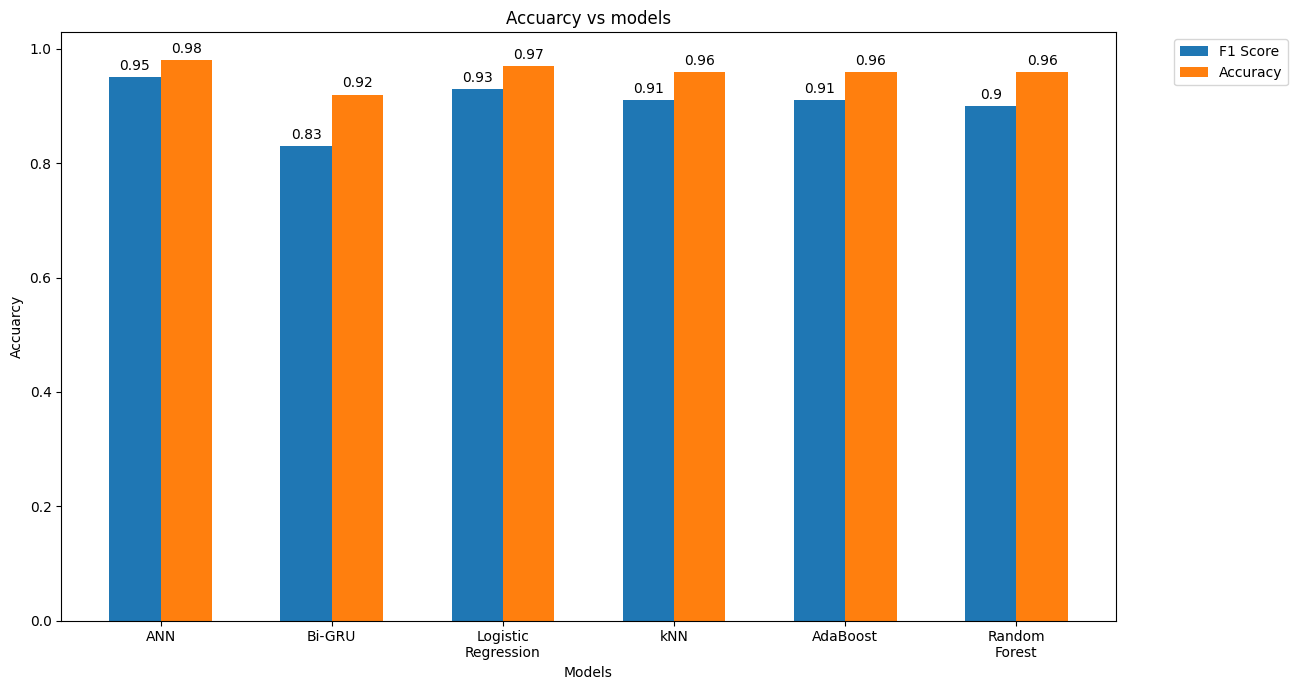

In [155]:
labels = ['ANN', 'Bi-GRU', 'Logistic\nRegression', 'kNN', 'AdaBoost', 'Random\nForest']
f1_score = [f1_mlp, f1_bgru, f1_lr, f1_knn, f1_ab, f1_rf]
testing_accuracy = [accuracy_mlp, accuracy_bgru, accuracy_lr, accuracy_knn, accuracy_ab, accuracy_rf]

f1_score = [round(elem, 2) for elem in f1_score ]
testing_accuracy = [round(elem, 2) for elem in testing_accuracy ]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(13, 7))
rects1 = ax.bar(x - width/2, f1_score, width, label='F1 Score')
rects2 = ax.bar(x + width/2, testing_accuracy, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuarcy')
ax.set_xlabel('Models')
ax.set_title('Accuarcy vs models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper right', bbox_to_anchor=(1.17, 1))


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Save the plot to a file
plt.savefig('images/accuracy_model.png')

plt.show()

## Plotting Heat map using the Best mode

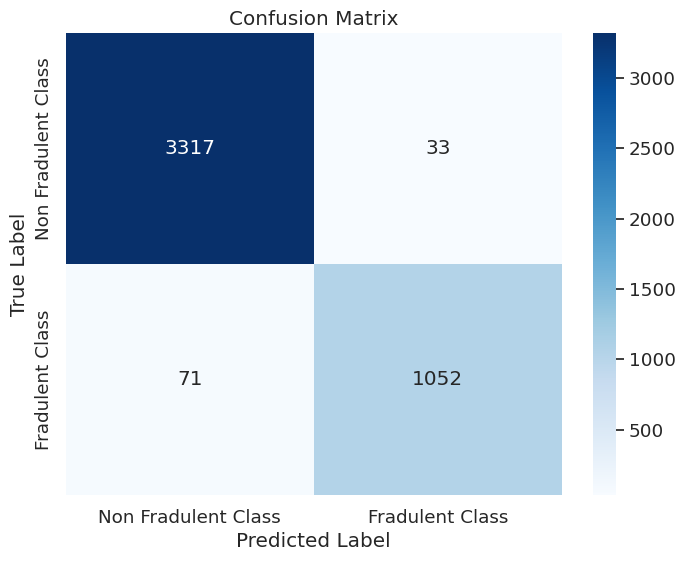

In [156]:
# Calculate confusion matrix
cm = confusion_matrix(test_targets_tensor, predicted_labels)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Non Fradulent Class', 'Fradulent Class'],
            yticklabels=['Non Fradulent Class', 'Fradulent Class'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Save the plot to a file
plt.savefig('images/heat_map.png')

plt.show()

In [157]:
import shutil
# Zipping the the images folder
shutil.make_archive('images', 'zip', '/kaggle/working/images')

'/kaggle/working/images.zip'